# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [326]:
%pip install --upgrade pip setuptools wheel
%pip install imblearn

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 435.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.1 MB 655.4 kB/s eta 0:00:04
   ------ --------------------------------- 0.3/2.1 MB 1.9 MB/s eta 0:00:01
   ----------------- ---------------------- 0.9/2.1 MB 4.3 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.1 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [327]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train Test Split
from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

#DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# Random Forest, AdaBoost, Gradient Boosting, Bagging, XGBoost classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

# SimpleImputer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer

# RandomGridSearchCV, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# XGBClassifier
from xgboost import XGBClassifier
  
# Under Sampling and Over Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# To get different performance metrics
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [328]:
df = pd.read_csv('./BankChurners.csv');     

data = df.copy()

data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [329]:
data.drop(['CLIENTNUM'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Data Overview

- Observations
- Sanity checks

In [330]:
# check for missing values
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [331]:
# attrition_flag is the target variable and check the distribution of the target variable in percentage
data['Attrition_Flag'].value_counts(normalize=True) * 100

Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64

### Summary
- Dataset has 10127 rows and 20 columns
- Education level and martial Status was having missing values and treated with imputing mode value of those column.
- Object data types are now convered to categorical type
- attrition_flag is imbalanced with 83% of existing customers and 16% of attrited customers and the modelmay be biased towards the majority class. We may need to treat with oversampling or undersampling later during model building.
- Droped Client number which is unique id for each customer and it will not have significant value in prediction.




## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [332]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [333]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [334]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [335]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [336]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


#### Critical observations from the above table:
- Total Transaction Amount , credit limit, Average Open To Buy and Total Transaction Count have a very high standard deviation, which means the data is spread out over a large range of values.

#### Univariate analysis

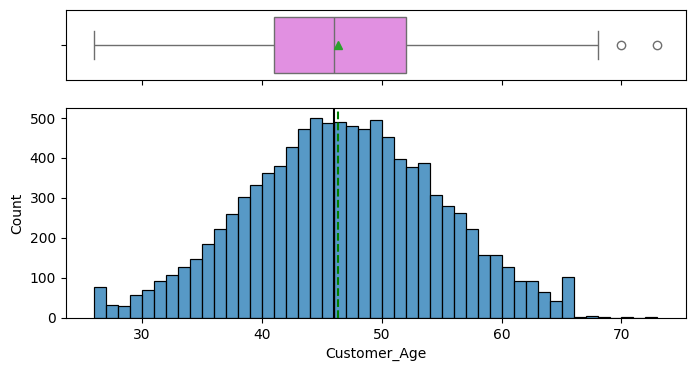

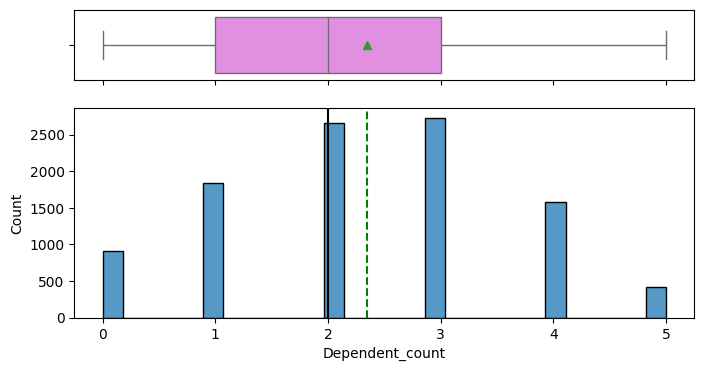

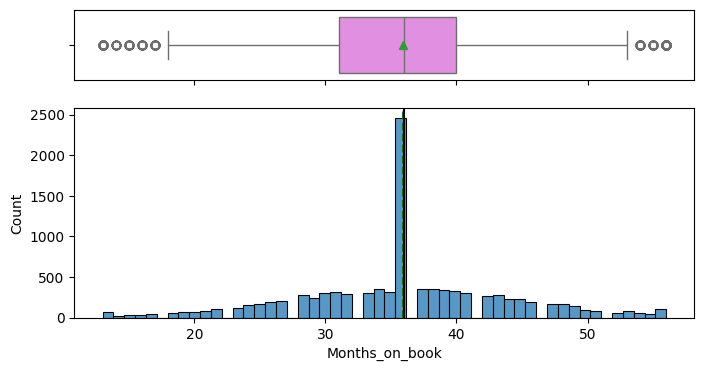

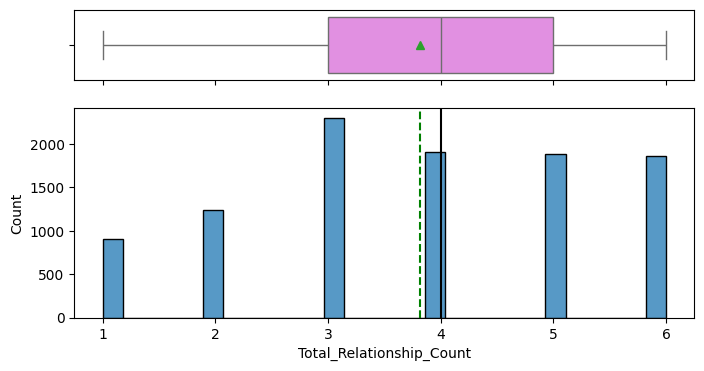

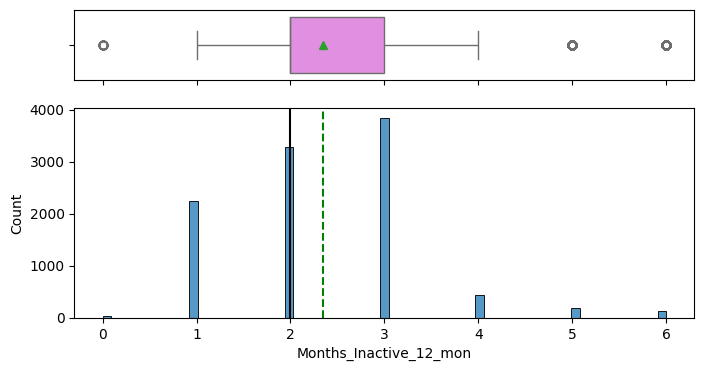

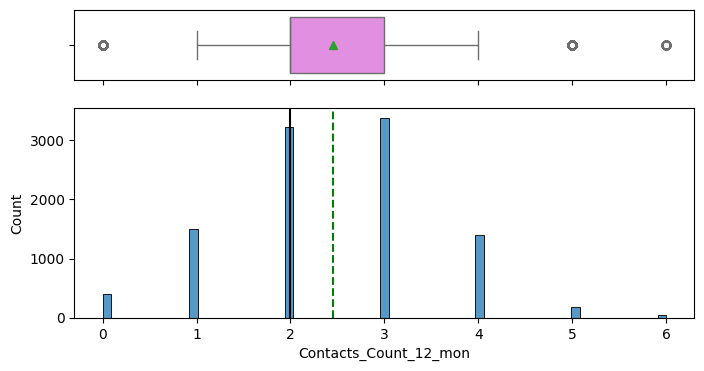

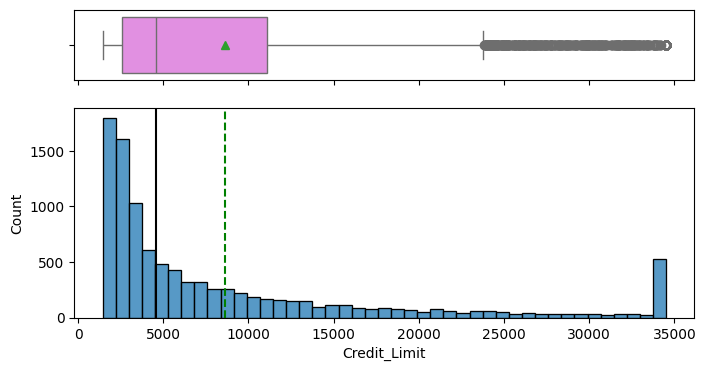

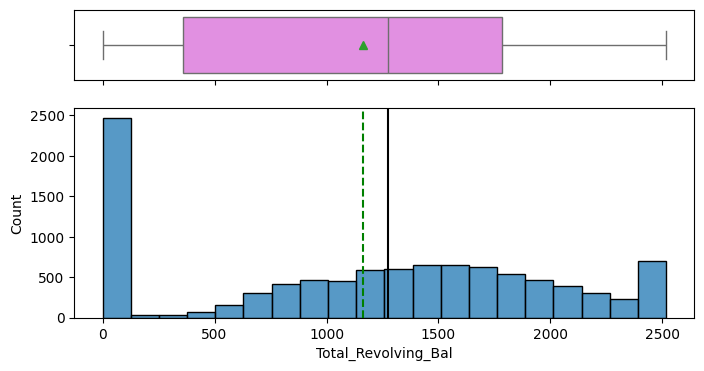

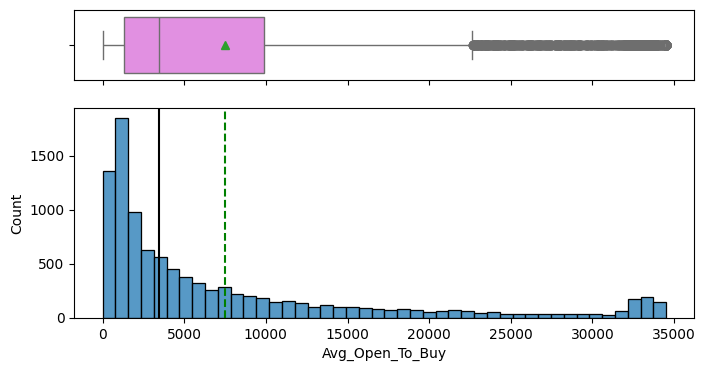

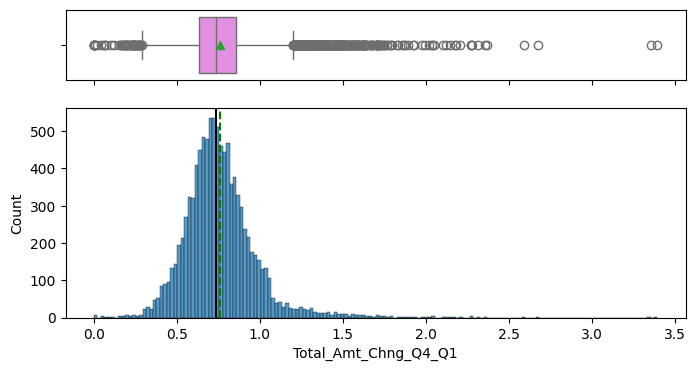

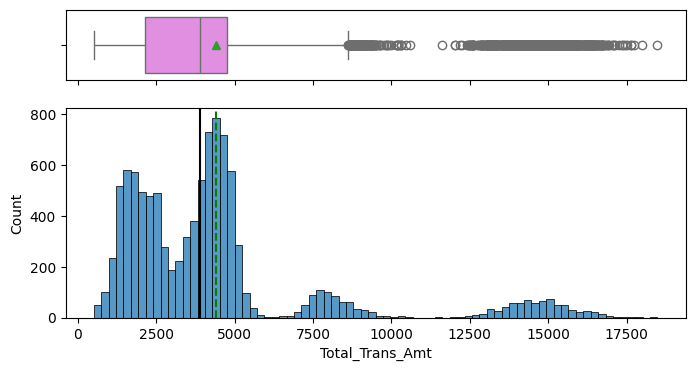

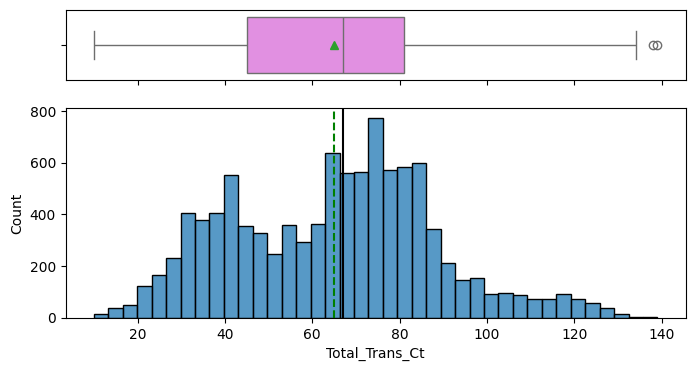

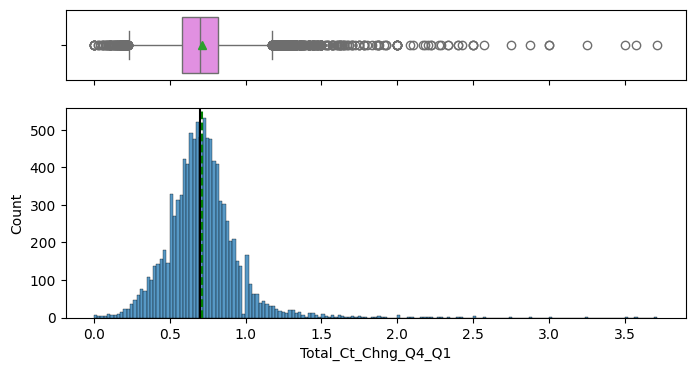

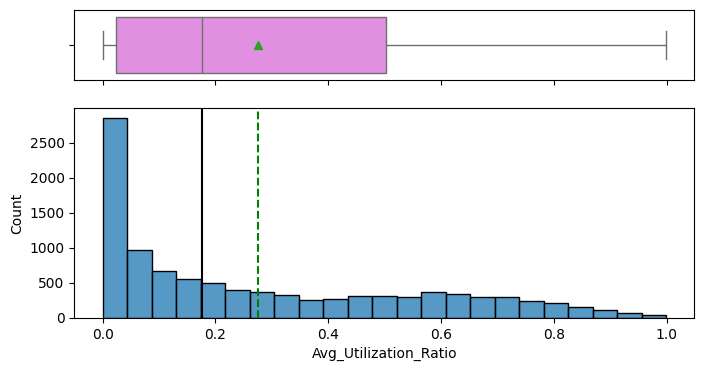

In [337]:
for col in data.columns:
 # if column is numerical
    if data[col].dtype != 'object' and data[col].dtype != 'category':
    # if column has more than 2 unique values
        if data[col].nunique() > 2:
        
        # plot boxplot
            histogram_boxplot(data, col, figsize=(8, 4))
            plt.show()
   

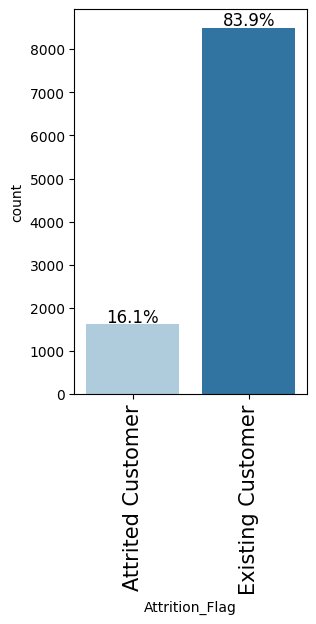

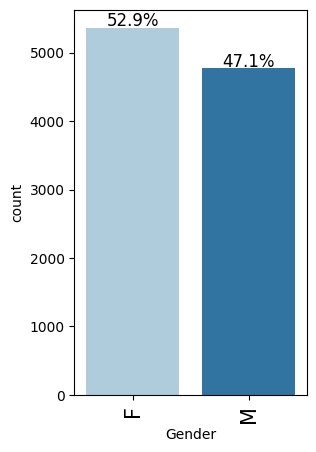

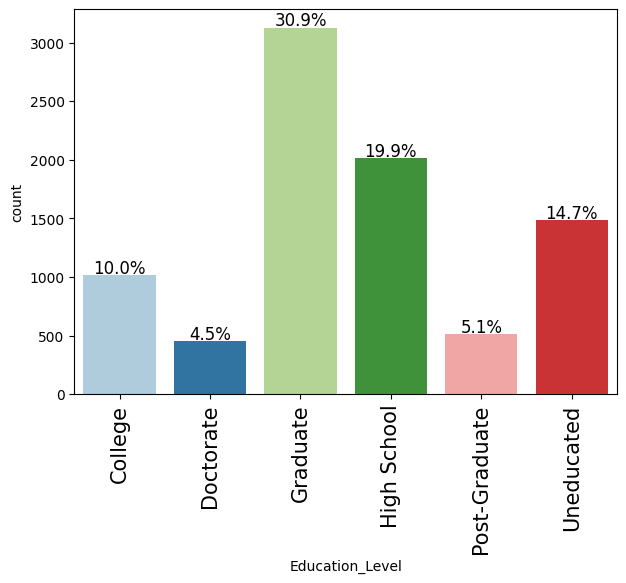

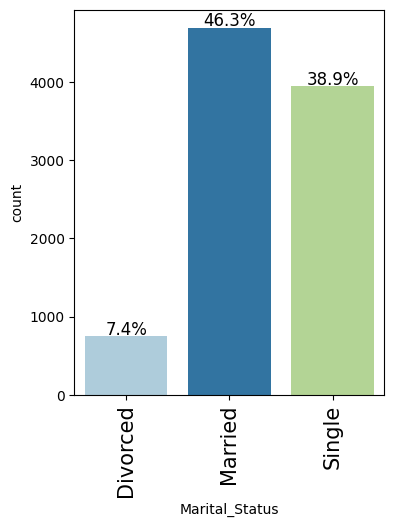

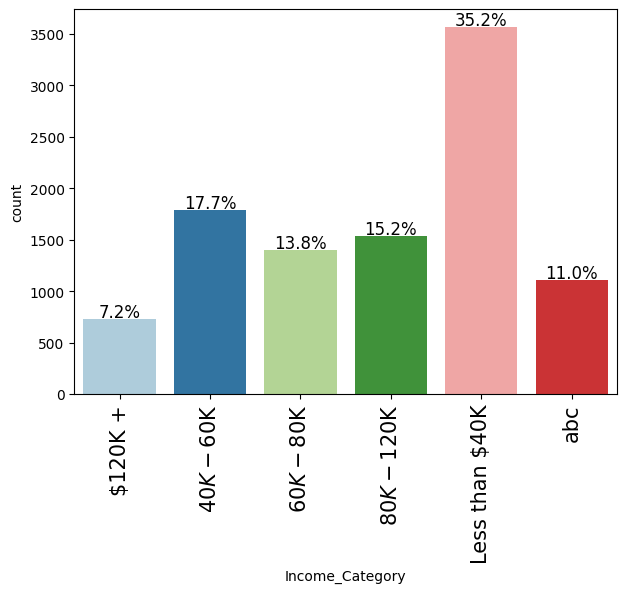

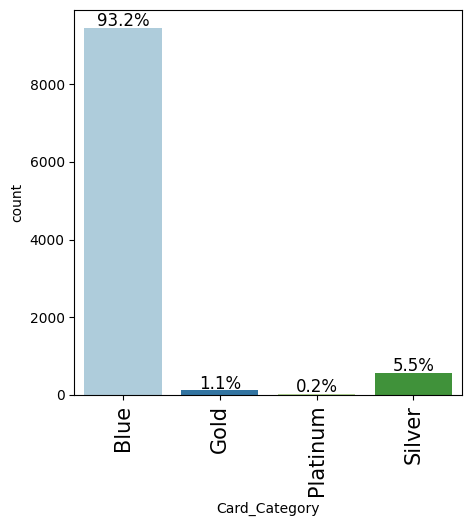

In [338]:
# Catetgorical columns analysis 
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        labeled_barplot(data, col, perc=True)

##### Observations
1. Customer Age,month on book ,total amount Change q4-q1 and Total Transaction Count are uniformly distributed and some of them has outliers. 
2. Credit Limit, Avg_Open_To_Buy, Total_Revolving_Bal are right skewed and has outliers.
3. Total transaction amount is right skewed and has outliers which are very far from the mean which signifies that there are some customers who are doing very high transactions.
4. Dependent count is right skewed and most of the customers have 2 or 3 dependents.
5.  Avg_Utilization_Ratio is right skewed and most number of customers have utilization ratio less than 20%.
6.  Customer has been with the bank for 36-37 months on average.
7.  Most of the customers have credit limit less than 10000.
8.  Most of the customers have 0-3000 average open to buy.
9.  Most of the customers have 0-1000 total revolving balance.
10. Most number of customer are from Blue and Silver card category
11.  There are more female customers 
12. Most of the customers have education level of Graduate ,high school and Uneducated
13. Slightly Over 50% of the customers have income level less than 60k and most of the customers have income level less than 40k
14. There are more number of customers who are either married or single with very few customers who are divorced and largest customers are in married category



### Multivariate Analysis

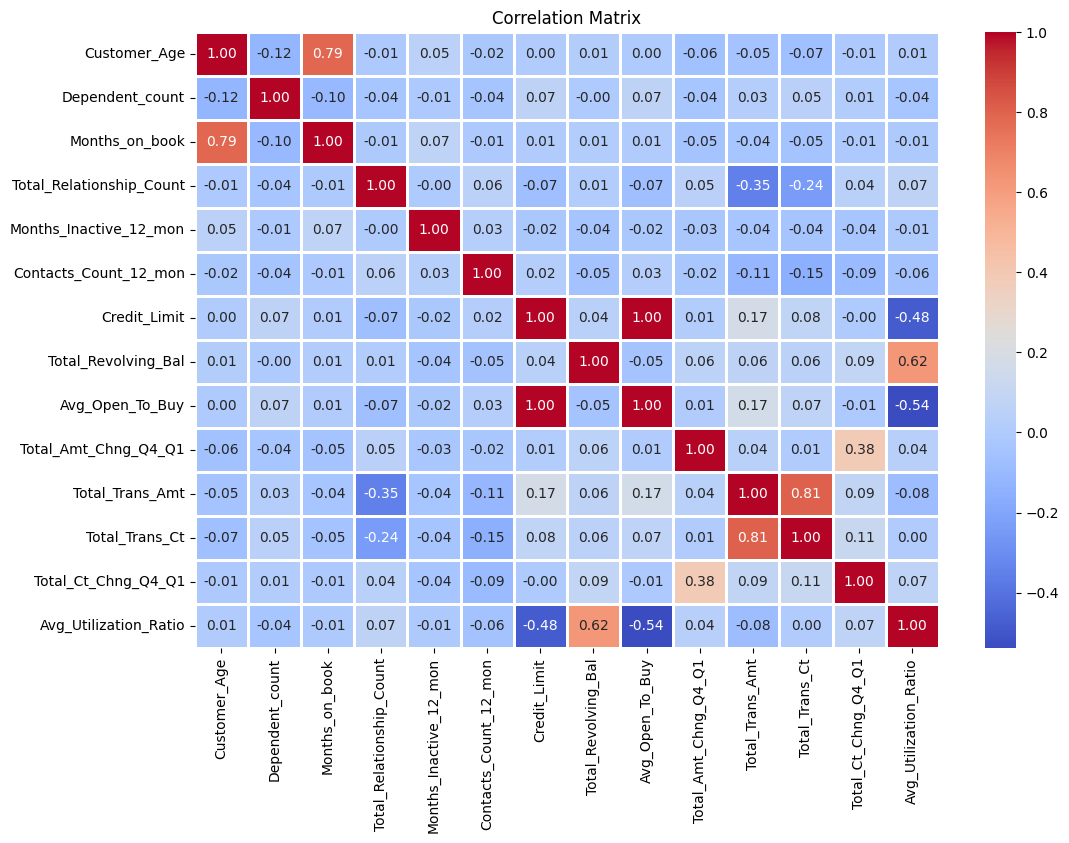

In [339]:
# Heatmap to check correlation
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=2)
plt.title("Correlation Matrix")
plt.show()


#### Observations
1. Customer_Age has high correlation with Months_on_book which is obvious as the longer the customer has been with the bank, the older the customer is likely to be. we can probably drop one of the columns.
2. Avg_Open_To_Buy has high correlation with Credit_Limit which is also obvious as the more credit a customer has, the more they can spend. Correlation is nearly 1 which means they are perfectly correlated , we will have drop one of the fields.
3. Total revolving balance has high correlation with average utilization ratio which is also obvious as the more a customer spends, the more they are likely to have a revolving balance. Correlation is 1 which means they are perfectly correlated , we can probably drop one of the columns.
4. credit limit has negative correlation with average utilization ratio which is also obvious as the more a customer spends, the more they are likely to have a revolving balance. Correlation is -0.48 which means they are negatively correlated , we can probably drop one of the columns.

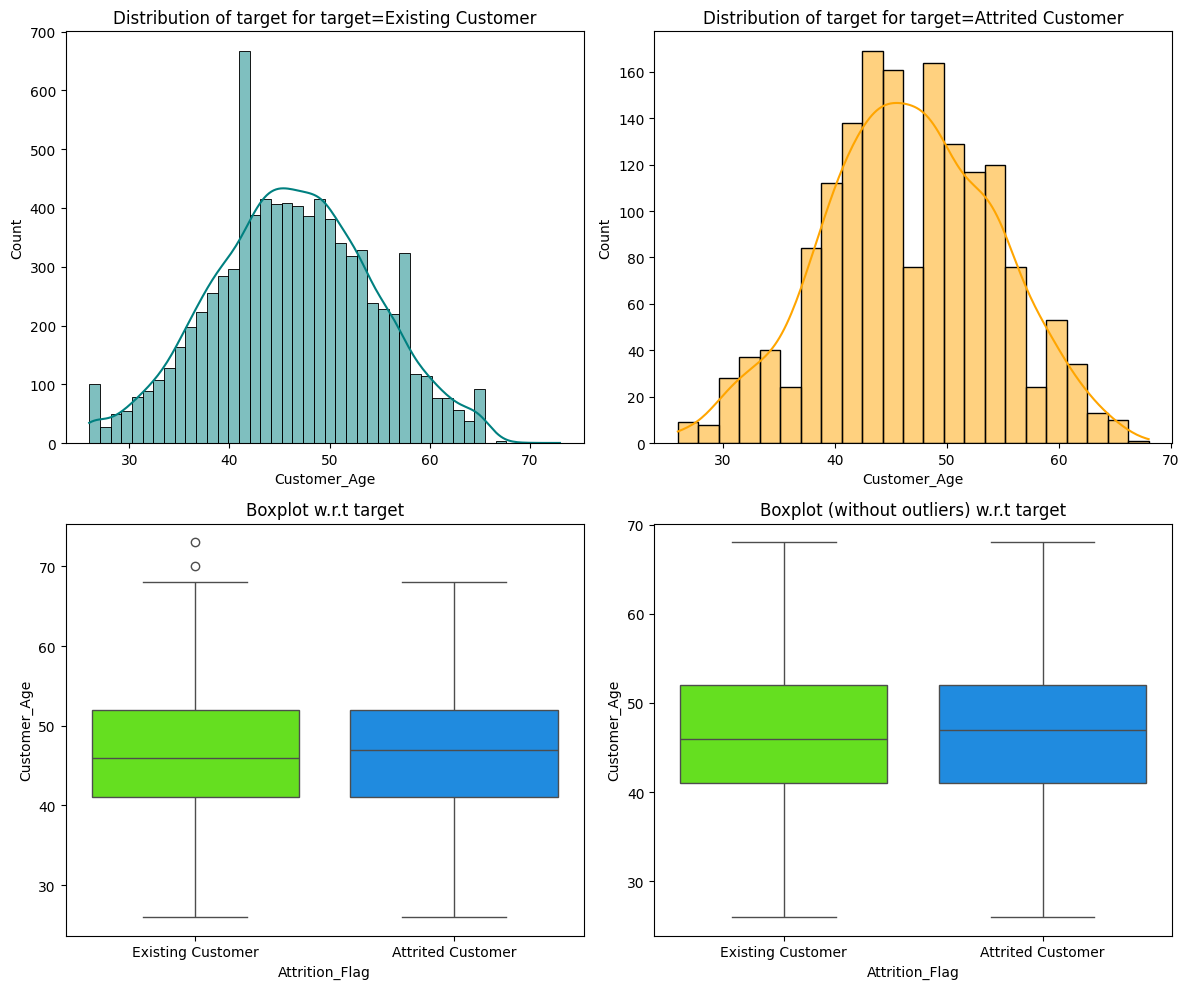

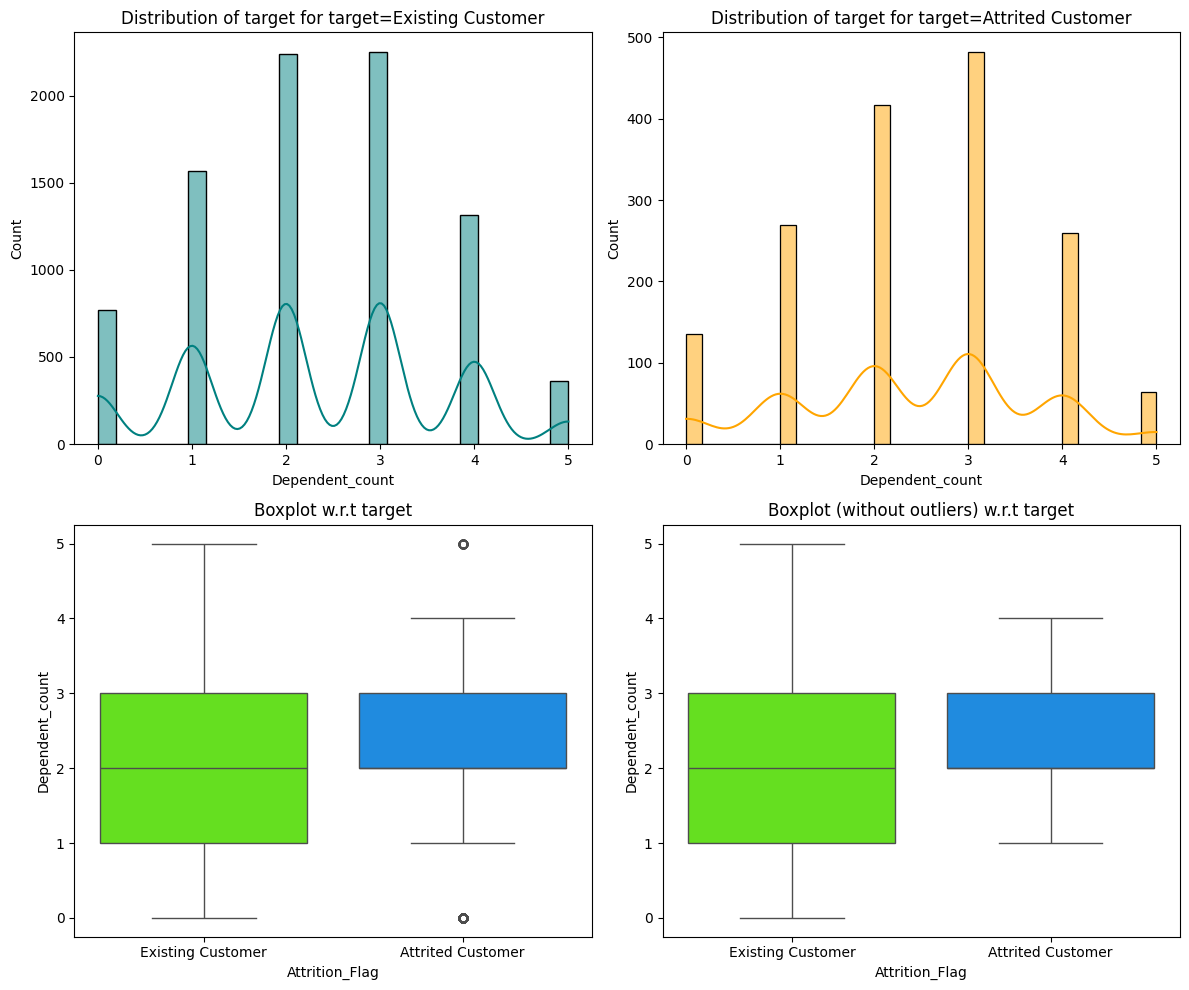

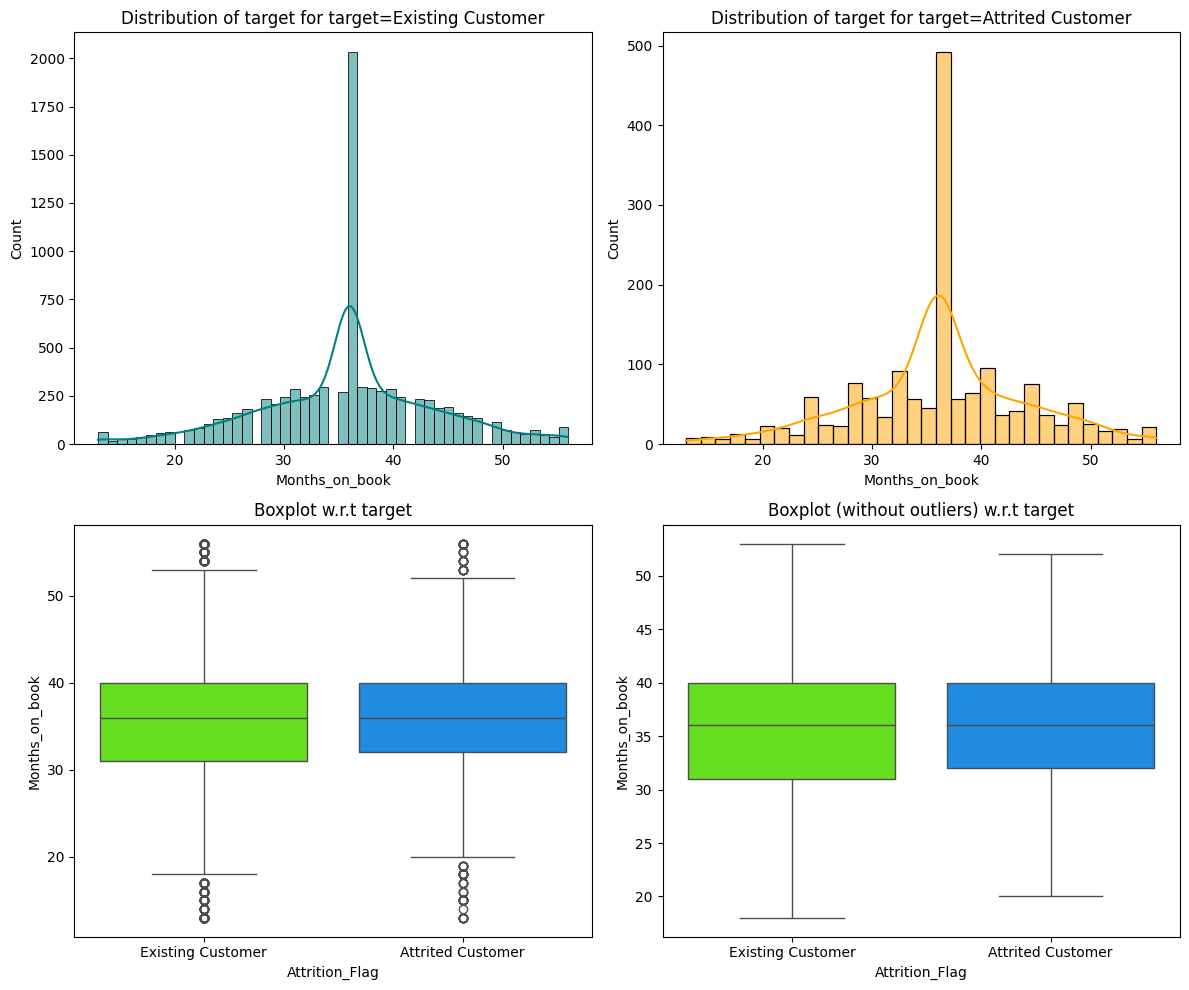

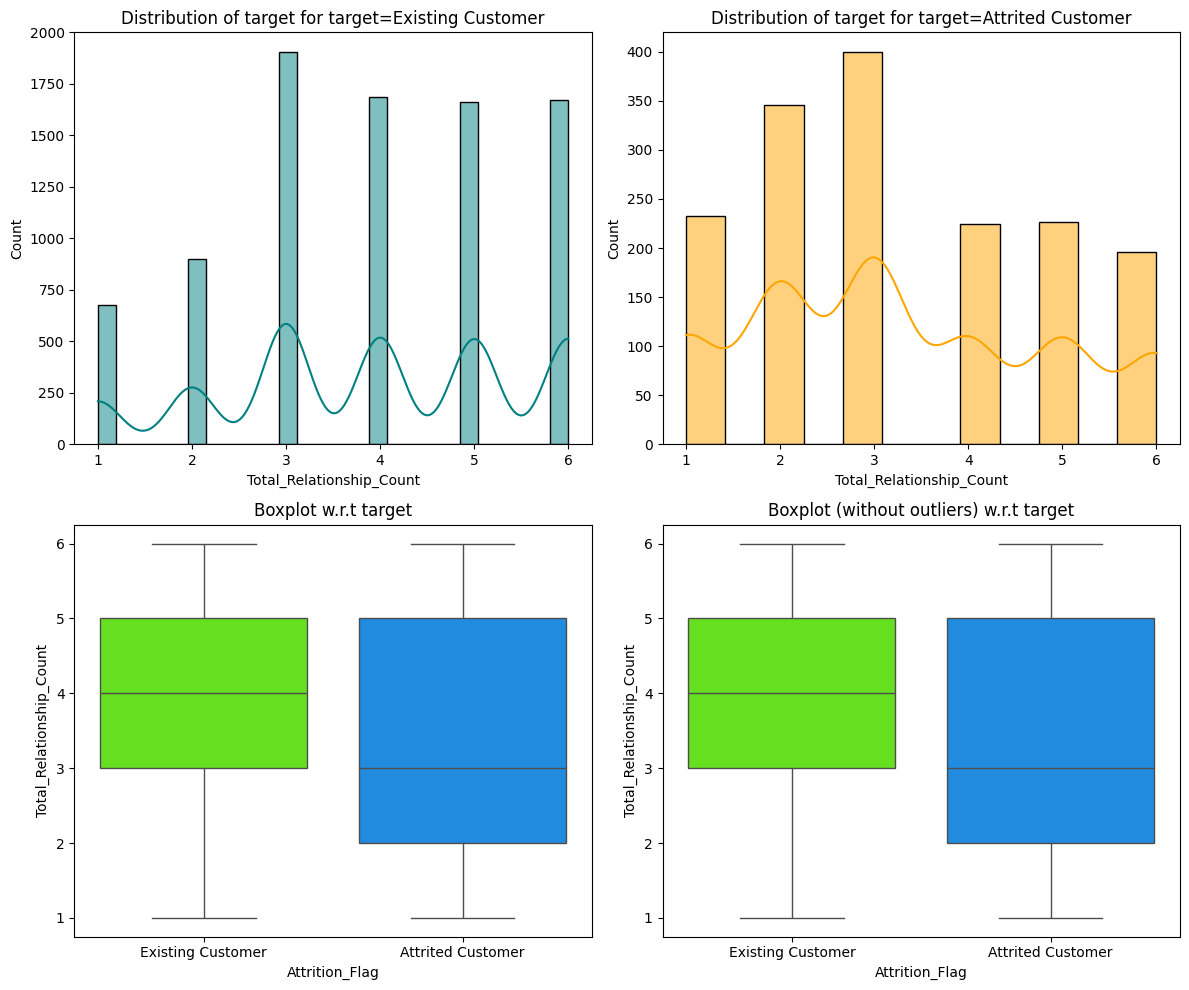

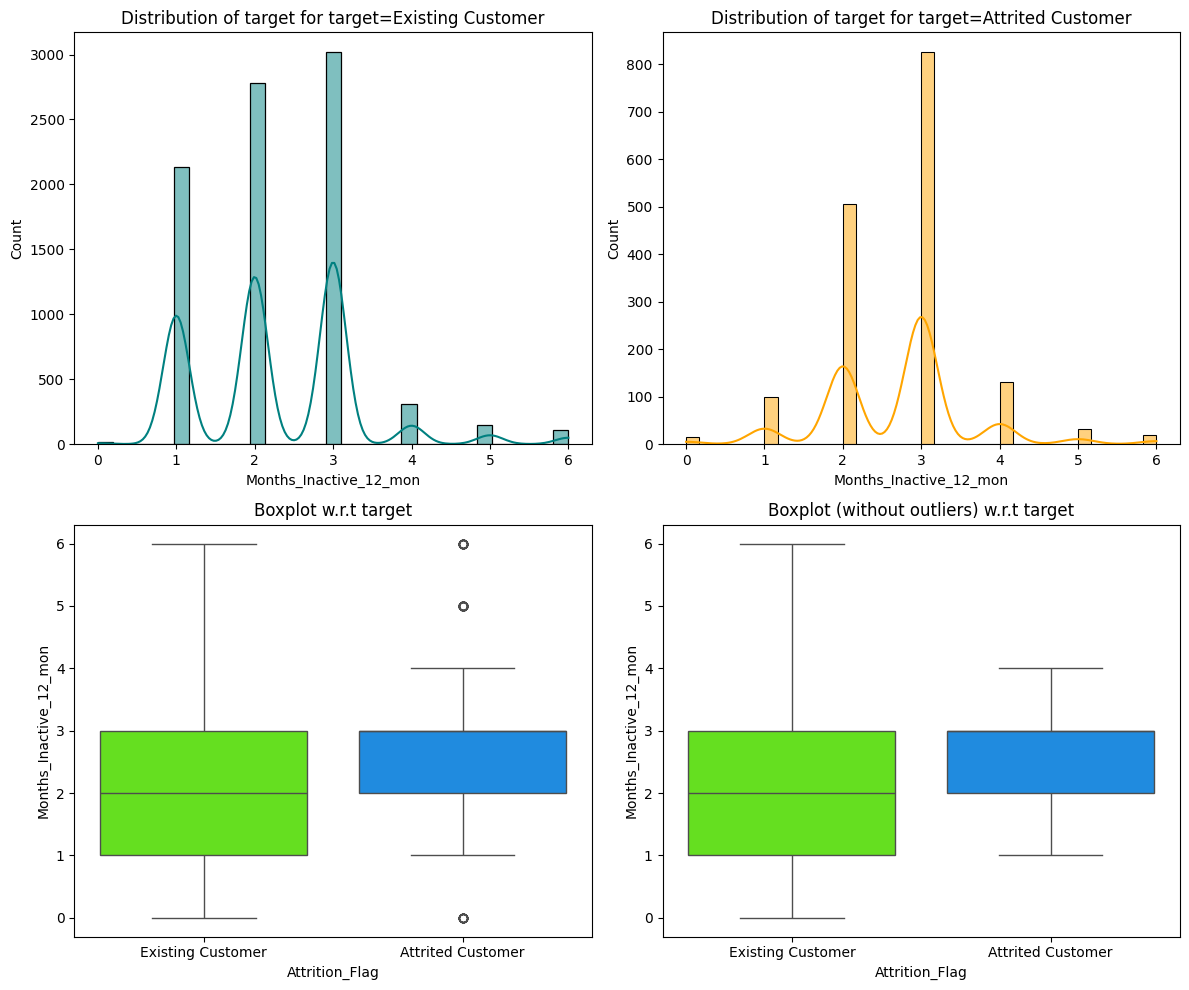

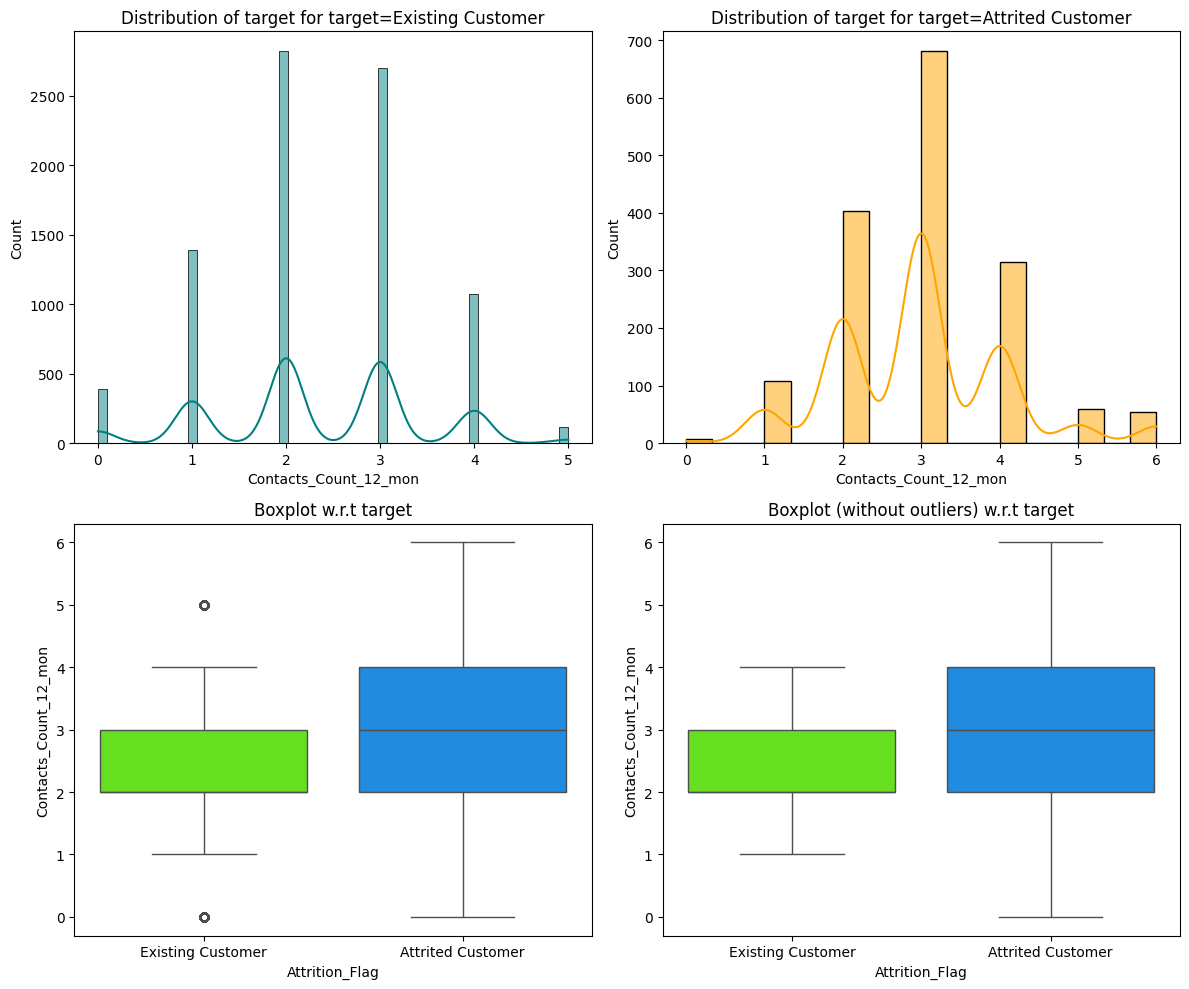

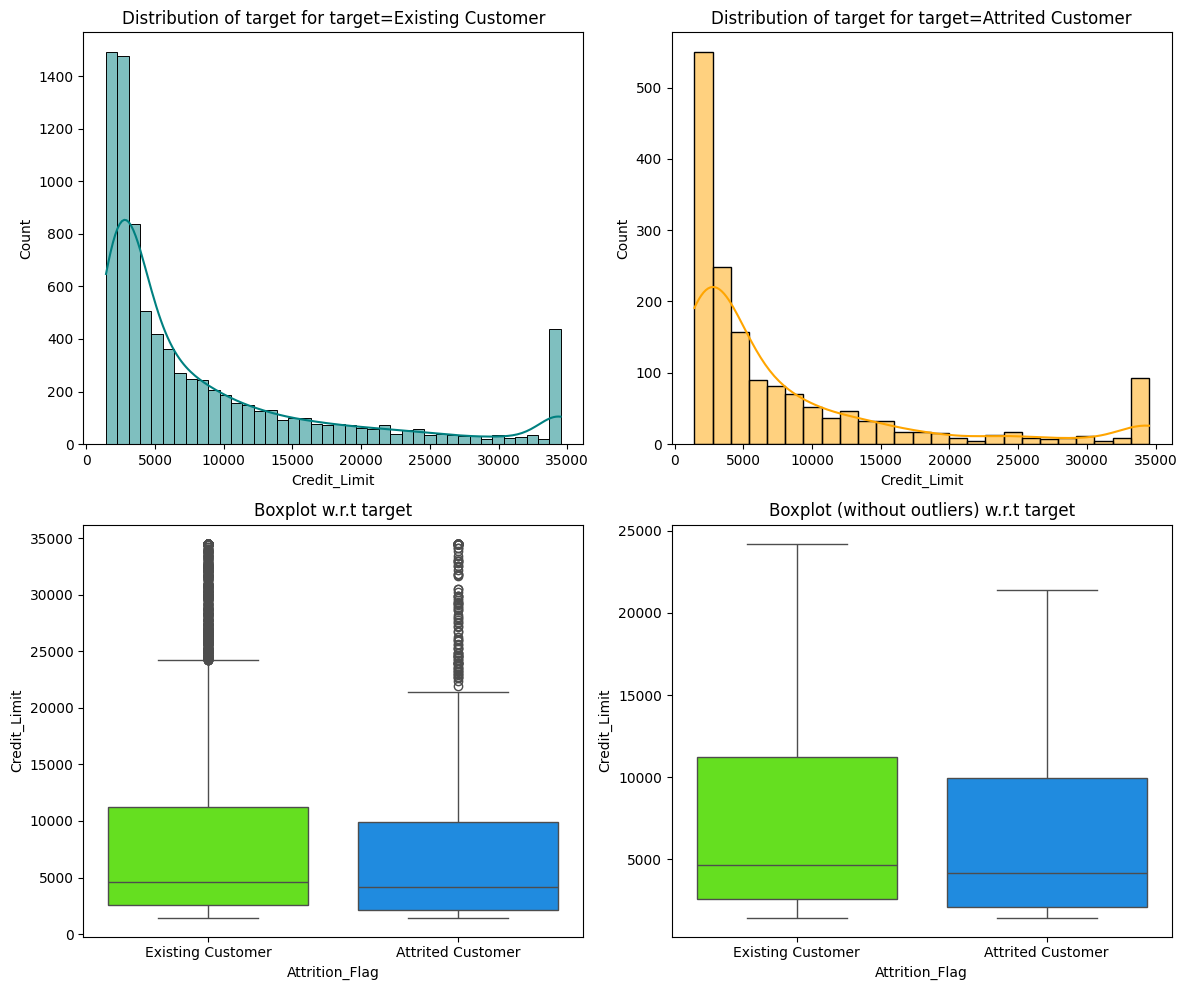

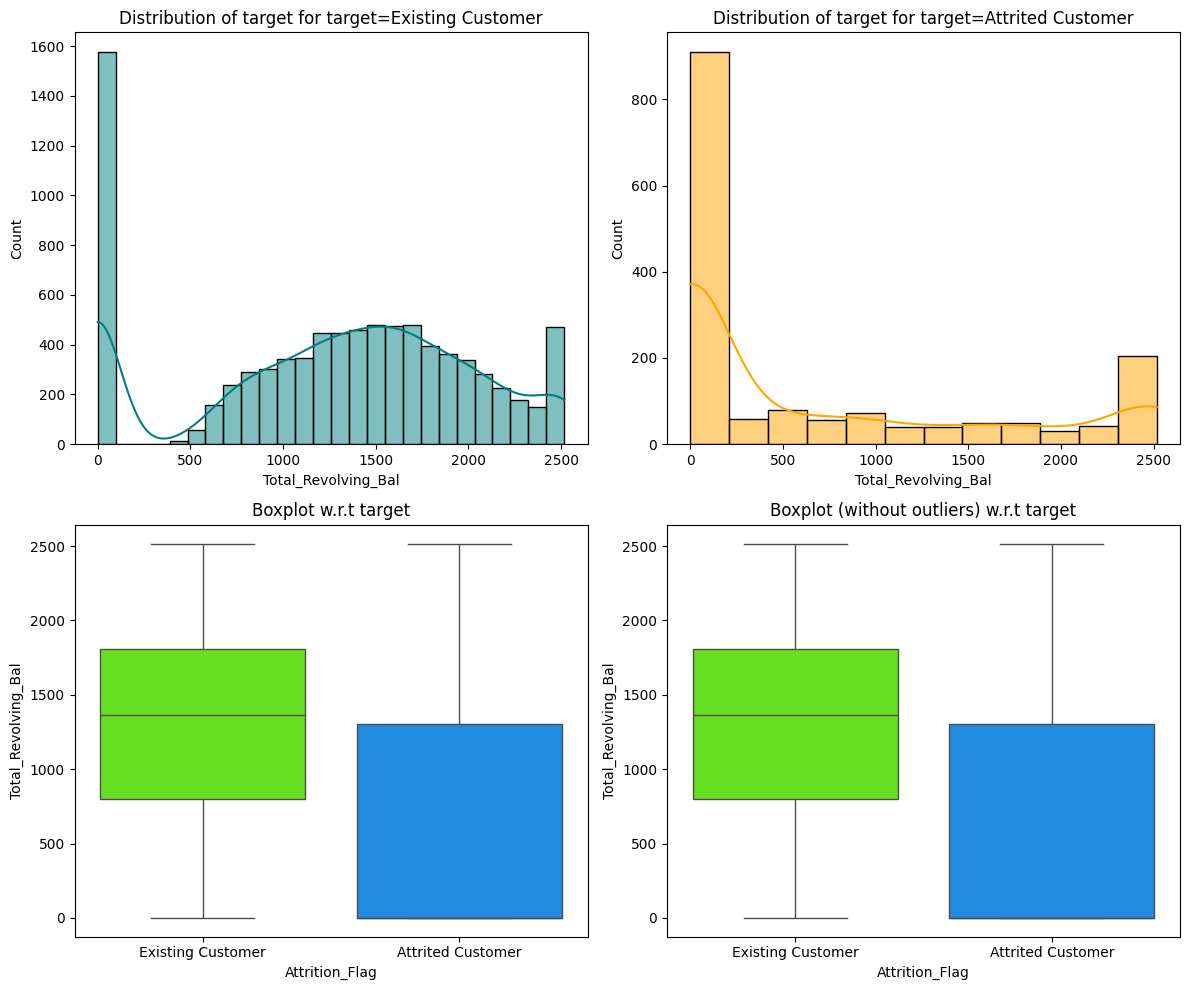

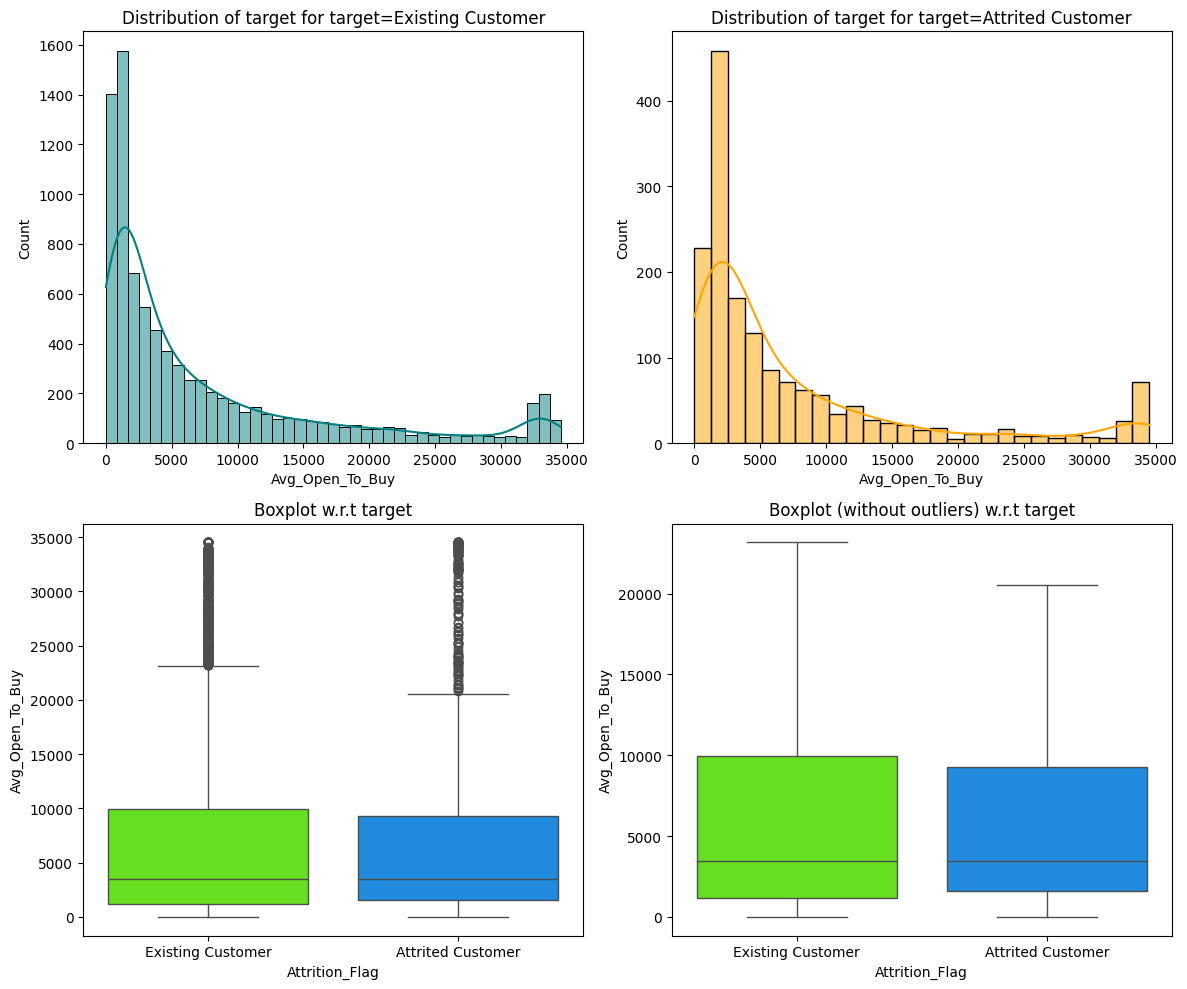

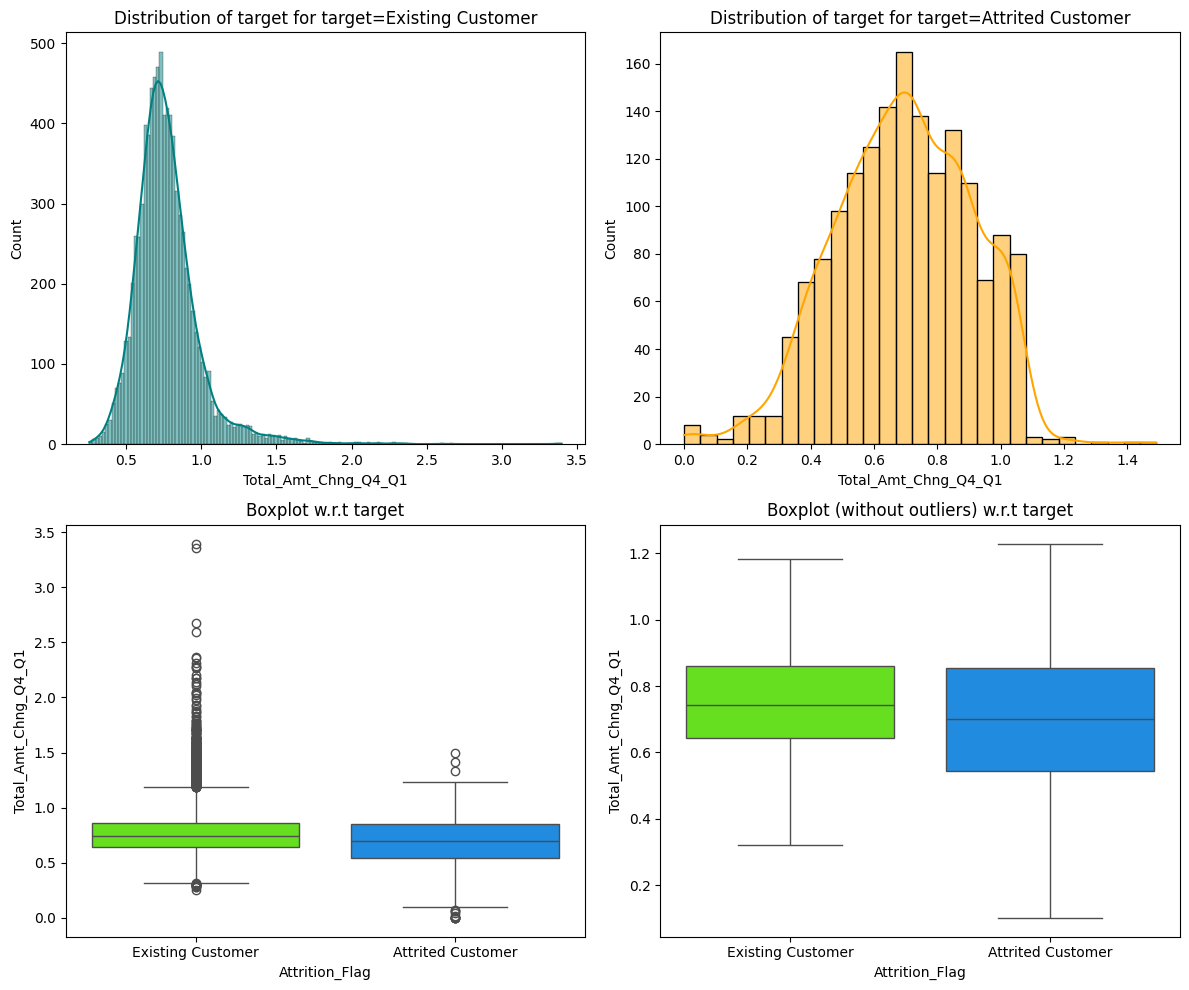

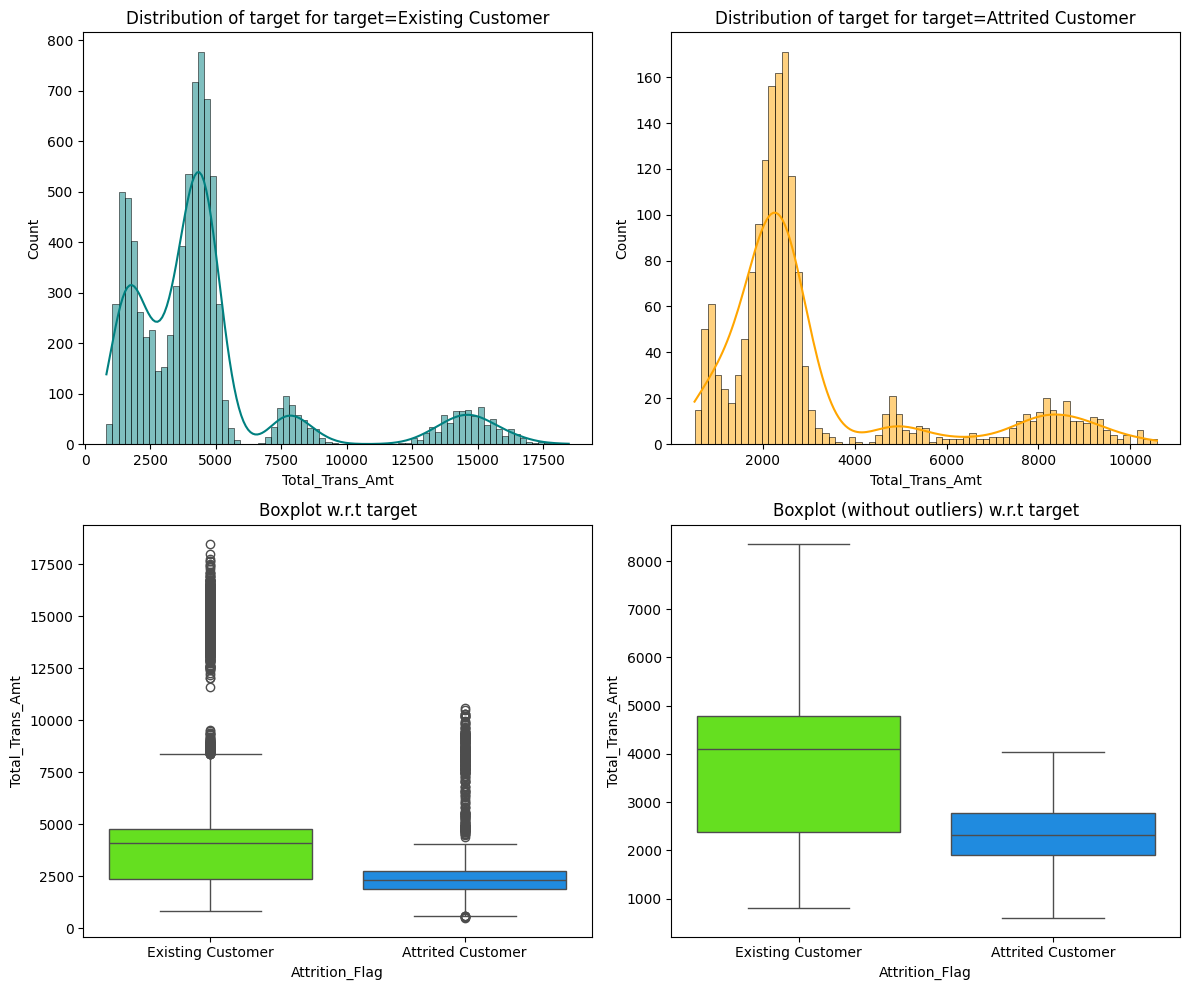

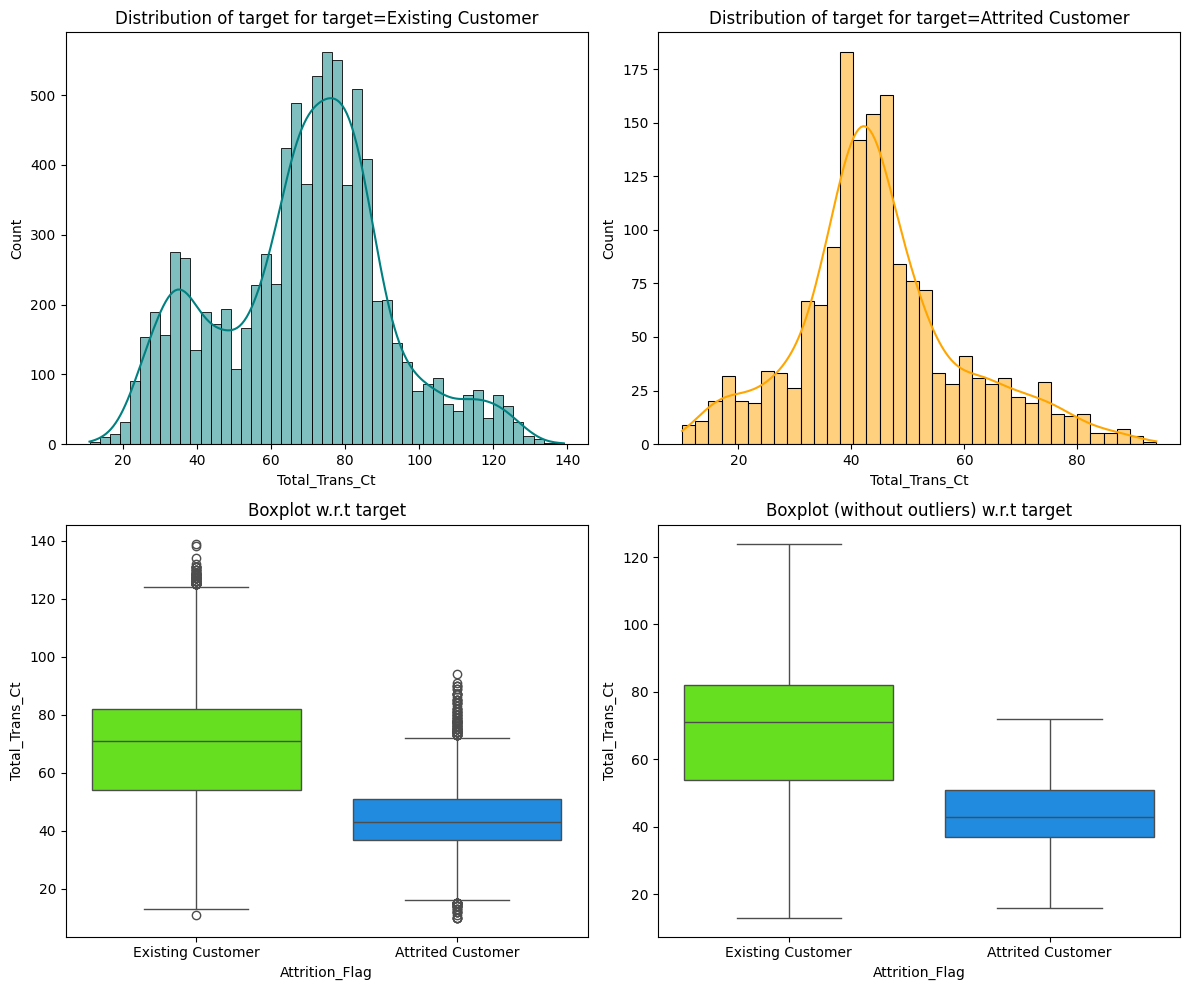

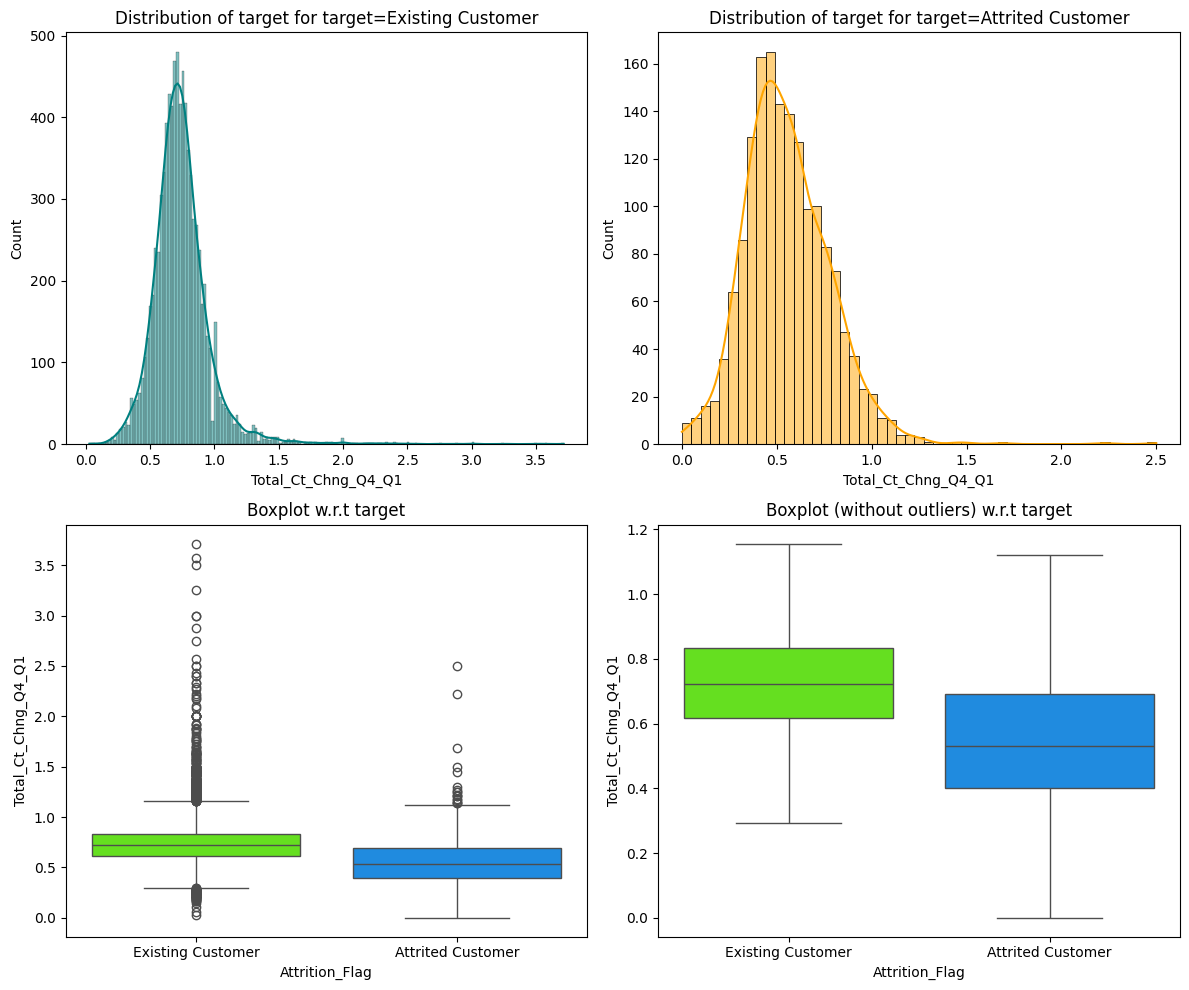

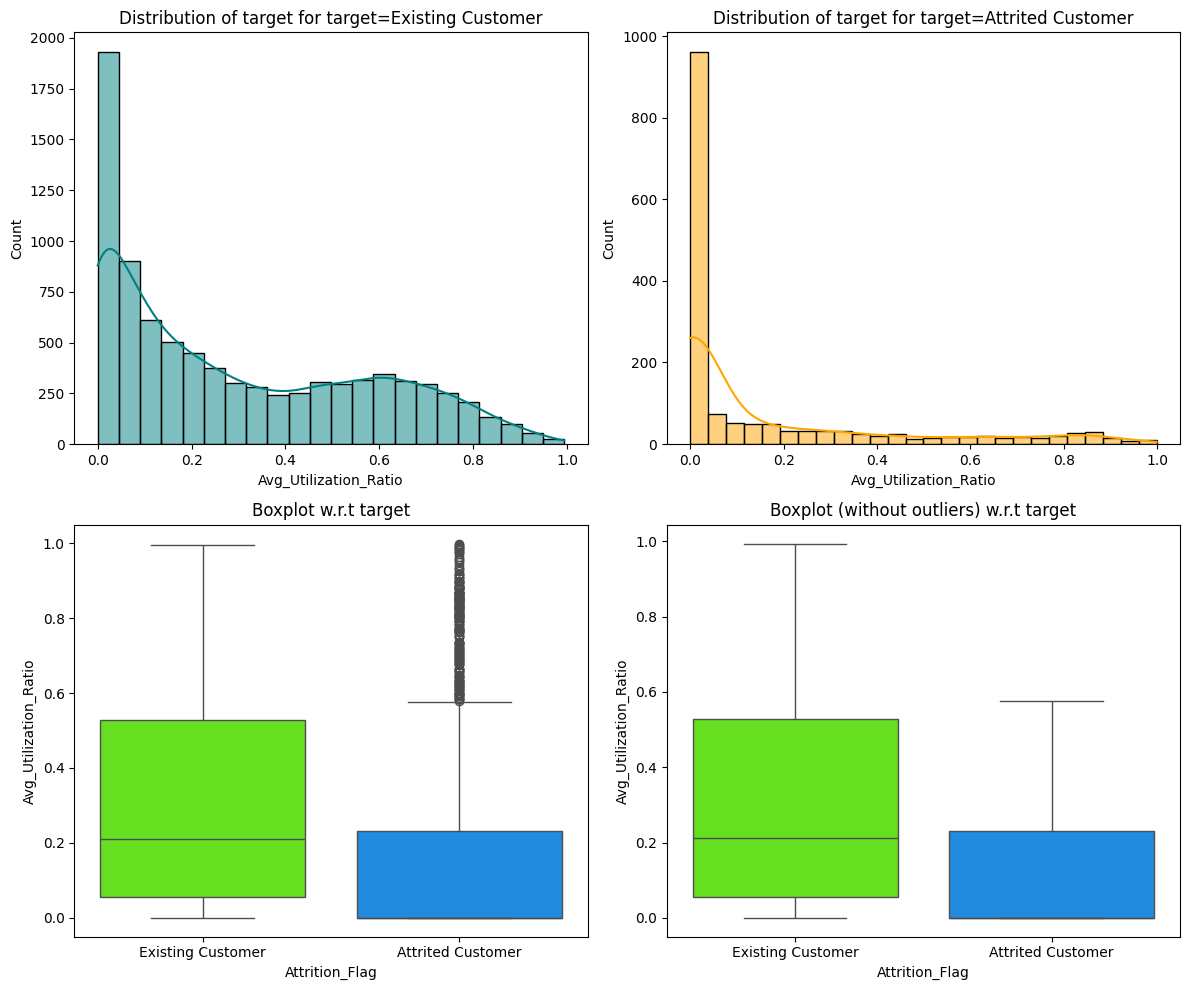

In [340]:
# Distribution of numerical columns w.r.t target
for col in numeric_data.columns:
    distribution_plot_wrt_target(data, col, "Attrition_Flag")

##### Observations
1. Relation Count show some variables have some overlap in their distribution, but some variables have a clear separation in their distribution w.r.t target variable. 
2. Customer age, Months on book does not show a clear separation in their distribution w.r.t target variable. We can test the model performance by including and excluding these variables.For now we will drop one of the columns as they have high correlation.
3. Total transaction amount , total transaction count and total transaction q4-q1  has a significant difference in distribution w.r.t target variable will have significant impact on the model.
4. All others show some differences but they are weak. Lets examine and understand the importance of the features.
5 

## Data Pre-processing

In [341]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [342]:
# convert the object type columns to category type
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].astype("category")

# check the data types
print("--------------------------------------------------------");
print(" Data Types of columns after conversion to category type");
print("--------------------------------------------------------");
print(data.dtypes)



--------------------------------------------------------
 Data Types of columns after conversion to category type
--------------------------------------------------------
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object


## Missing value imputation




In [343]:
# Split the data into X and y and drop customer age due to its high corelation with month_on_bank and target variable
X = data.drop(["Attrition_Flag" ,"Customer_Age"], axis=1) # independent columns
y = data["Attrition_Flag"] # target column
X.isnull().sum()

# impute the mmissing values in categorical columns with mode
# Let's impute the missing values
impute_mode = SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
cat_cols = X.select_dtypes(include='category').columns
X[cat_cols] = pd.DataFrame(impute_mode.fit_transform(X[cat_cols]), columns=cat_cols)

# let impute the missing values in numerical columns with median if any
impute_median = SimpleImputer(missing_values=np.nan ,strategy='median')
num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = pd.DataFrame(impute_median.fit_transform(X[num_cols]), columns=num_cols)
 
# check for missing values
print("--------------------------------------------------------");
print(" Missing Values after imputation");
print("--------------------------------------------------------");
print(X.isnull().sum())
 


--------------------------------------------------------
 Missing Values after imputation
--------------------------------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


## Create Train,Validation and Test Dataset

In [344]:
# One hot encode the categorical columns
X = pd.get_dummies(X, drop_first=True)
# Replace the target variable with 0 and 1 for Existing Customer and Attrited Customer respectively
y.replace({"Existing Customer": 0, "Attrited Customer": 1}, inplace=True)

# Splitting data into training, validation and test set: 50% train, 20% validation, 30% test
# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

 

(5063, 29) (3038, 29) (2026, 29)


In [345]:

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Attrition_Flag
0    0.839423
1    0.160577
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Attrition_Flag
0    0.839368
1    0.160632
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Attrition_Flag
0    0.839092
1    0.160908
Name: proportion, dtype: float64
********************************************************************************


* Clearly Classes in all dataset are imbalanced with 84% and 16% split. We will deal this imbalance problem with undersampling and oversampling later in model building.

In [346]:
X_train.head().values

array([[1.0, 45.0, 5.0, 2.0, 2.0, 6778.0, 865.0, 5913.0, 0.992, 3158.0,
        71.0, 0.775, 0.128, False, False, True, False, False, False,
        True, False, True, False, False, False, False, False, False,
        False],
       [0.0, 53.0, 6.0, 1.0, 4.0, 12554.0, 2169.0, 10385.0, 0.529,
        1422.0, 30.0, 0.579, 0.173, True, False, True, False, False,
        False, True, False, False, True, False, False, False, False,
        False, False],
       [1.0, 50.0, 3.0, 3.0, 1.0, 3359.0, 1405.0, 1954.0, 0.684, 4871.0,
        79.0, 0.975, 0.418, False, False, True, False, False, False,
        True, False, False, False, False, False, True, False, False,
        False],
       [2.0, 35.0, 5.0, 2.0, 2.0, 1849.0, 1293.0, 556.0, 0.835, 4678.0,
        71.0, 0.972, 0.699, True, False, False, True, False, False,
        False, True, False, True, False, False, False, False, False,
        False],
       [2.0, 35.0, 4.0, 5.0, 3.0, 34516.0, 668.0, 33848.0, 0.894, 3931.0,
        77.0, 0.791,

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**what is important for Bank**
* Bank wants to identify the customers who are likely to churn. Identifying the customers who are likely to churn is more important than identifying the customers who are not likely to churn. So, we need to focus on recall score.


**Which metric to optimize?**

* If Model doesnt correctly predict the customer who will not churn, the bank will not be able to take any action to retain the customer and likely to lose the customer and potential revenue.
* if model incorrectly predicts the customer who will not churn,  the bank will take unnecessary action to retain the customer and it will be a cost to the bank.
* However, the cost of losing a customer is higher than the cost of retaining a customer. Therefore, we will use recall as the main evaluation metric to evaluate the model performance and in addition we will also focus on Precision and F1 score to minimize the false postives. 

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [347]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target, name, datatype="train"):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    roc_score = roc_auc_score(target, pred)  # to compute ROC AUC score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {   "Model": [name],
             "Data Type": [datatype],
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "ROC AUC Score": roc_score,

        },
        index=[0],
    )

    return df_perf

In [348]:
# confusion matrix
def plot_confusion_matrix(model, X, y, name):
    """
    Function to plot confusion matrix

    model: classifier
    X: independent variables
    y: dependent variable
    """
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt="d", cmap="YlGnBu")
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix -" + name)
    ax.xaxis.set_ticklabels(["Existing Customer", "Attrited Customer"])
    ax.yaxis.set_ticklabels(["Existing Customer", "Attrited Customer"])

### Model Building with original data

##### Model Building and Evaluation #####

In [349]:
default_scores = []  # Empty list to store all the scores
 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic Regression Default", LogisticRegression(random_state=1)))
models.append(("Bagging Default", BaggingClassifier(random_state=1)))
models.append(("Random forest Default", RandomForestClassifier(random_state=1)))
models.append(("Decision Tree Default", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost Default", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting Default", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost Default", XGBClassifier(random_state=1)))
 
for name, model in models:
    if model == "Logistic Regression":
        # scale the data for logistic regression using standard scaler as it is sensitive to the magnitude of the features
        scaler = StandardScaler()
        X_train_data = scaler.fit_transform(X_train)
        X_val_data = scaler.transform(X_val)
    else:
        X_train_data = X_train
        X_val_data = X_val
    # fit the model to the training data
    model.fit(X_train_data, y_train)
    # compute the performance of the model
    scores = model_performance_classification_sklearn(model,X_train_data, y_train, name=name)
    # store the scores for the model in a list for later use and final validation
    default_scores.append(scores)
 

 
# Print the scores
print("\n" "Training Performance:" "\n")
# 
pd.concat(default_scores, ignore_index=True).sort_values(by="F1", ascending=False)



Training Performance:



,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
2,Random forest Default,train,1.000000,1.000000,1.000000,1.000000,1.000000
3,Decision Tree Default,train,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost Default,train,1.000000,1.000000,1.000000,1.000000,1.000000
1,Bagging Default,train,0.995457,0.971710,1.000000,0.985652,0.985855
5,Gradient Boosting Default,train,0.977484,0.894219,0.962914,0.927296,0.943815
4,AdaBoost Default,train,0.960893,0.854859,0.896774,0.875315,0.918018
0,Logistic Regression Default,train,0.887814,0.485855,0.724771,0.581738,0.725280


In [350]:
 
#  Performance evaluation with validation set
default_scores = [scores for scores in default_scores if scores["Data Type"].values[0] == "train"]
for name, model in models:
    model.fit(X_train, y_train)
    scores_val =model_performance_classification_sklearn(model, X_val, y_val,name=name, datatype="validation")
    # store the scores for the model in a list for later use and final validation
    default_scores.append(scores_val)
        
# Print the scores
print("\n" "Validation Performance:" "\n")
pd.concat(default_scores, ignore_index=True).sort_values(by="F1", ascending=False).where(lambda x : x["Data Type"] == "validation").dropna()
 


Validation Performance:



,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
13,XGBoost Default,validation,0.967413,0.868852,0.923747,0.895459,0.927563
12,Gradient Boosting Default,validation,0.957867,0.813525,0.914747,0.861171,0.899507
11,AdaBoost Default,validation,0.954905,0.815574,0.894382,0.853162,0.898571
9,Random forest Default,validation,0.950955,0.754098,0.926952,0.831638,0.871363
8,Bagging Default,validation,0.947992,0.782787,0.880184,0.828633,0.881197
10,Decision Tree Default,validation,0.927584,0.770492,0.776860,0.773663,0.864069
7,Logistic Regression Default,validation,0.886109,0.473361,0.721875,0.571782,0.719229


**Observations**
- Overall xgboost is the best model with highest accuracy, precision, recall and f1 score both on training and validation set.  Recall in validation set is 0.87 which is the highest among all models and also less overfitting compared to other models. We will use xgboost model further with balanced data and hyperparameter tunning to check if we can improve the recall score
- LogisticRegression is least performing model with lowest accuracy, precision, recall and f1 score both on training and validation set. Its lowest recall score suggests that it is not able to identify the attrited customers properly and also implices presence of non linearity in the data.
- Gradient boosting classifier also has the best performance and we will also use this for validating with test set

##### Confusion Matrix #####

Logistic Regression Default


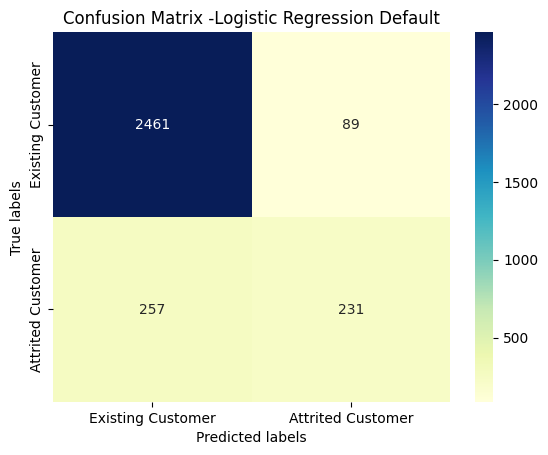

Bagging Default


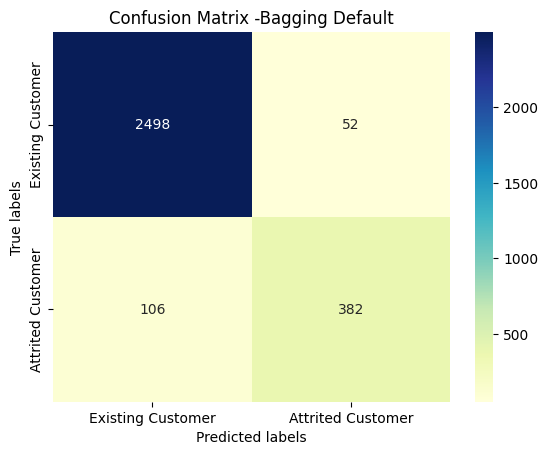

Random forest Default


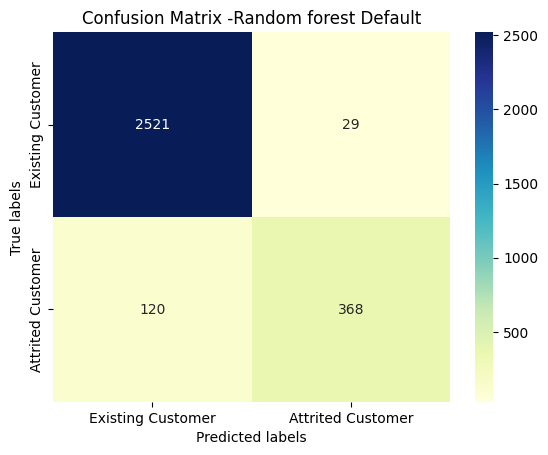

Decision Tree Default


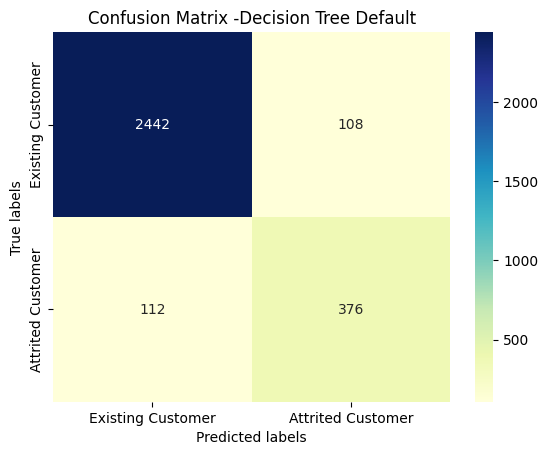

AdaBoost Default


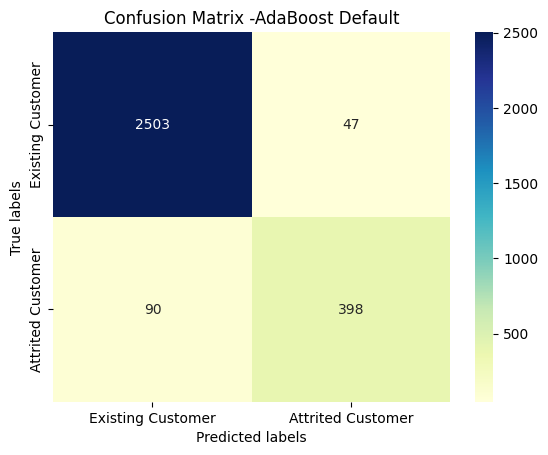

Gradient Boosting Default


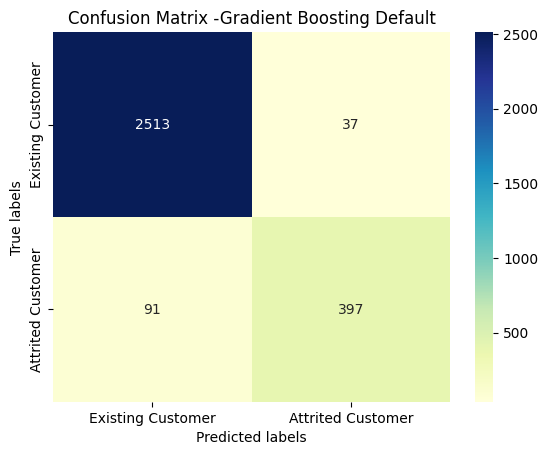

XGBoost Default


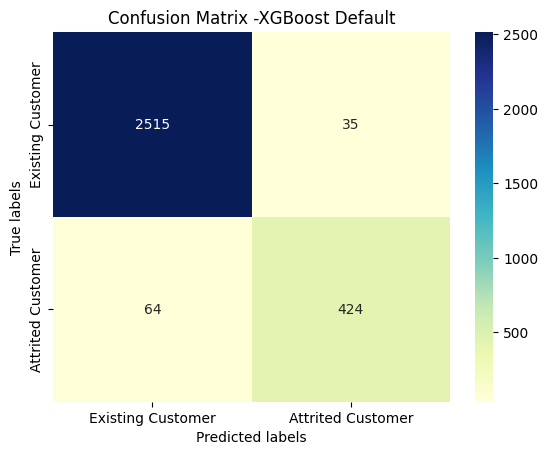

In [351]:
# plot confusion matrix for all models
for name, model in models:
    print(name)
    plot_confusion_matrix(model, X_val, y_val,name=name)
    plt.show()

- Confusion matrix also shows that the models are not performing well in predicting the attrited customers due to class imbalance in the target variable. 
- Prediction misses identifying most of the attrited customers including the best performing model XGBoost. 
- The models are biased towards the majority class and hence the accuracy is high but the recall is very low.
- We need to handle the class imbalance in the target variable to improve the model performance. we will use sampling techniques to handle the class imbalance in the target variable.

### Model Building with Oversampled data


In [352]:
# Synthetic Minority Over Sampling Technique (SMOTE) to handle class imbalance in the training and create synthetic data for minority class
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# fit the resampling method to the training data
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

X_train_over.shape, y_train_over.shape

((8500, 29), (8500,))

**Observations**
- Now training set has around 8500 rows with addition data created by oversamplings.

In [353]:
oversample_score = []  # Empty list to store all the scores
models = []  # Empty list to store all the models
models.append(("Logistic Regression -Over", LogisticRegression(random_state=1))) # Logistic Regression
models.append(("Bagging - Over", BaggingClassifier(random_state=1))) # Bagging
models.append(("Random forest - Over", RandomForestClassifier(random_state=1))) # Random forest
models.append(("Decision Tree - Over", DecisionTreeClassifier(random_state=1))) # Decision Tree
models.append(("AdaBoost - Over", AdaBoostClassifier(random_state=1))) # AdaBoost
models.append(("Gradient Boosting -Over", GradientBoostingClassifier(random_state=1))) # Gradient Boosting
models.append(("XGBoost - Over", XGBClassifier(random_state=1))) # XGBoost
 
for name, model in models:
    # fit the model with oversampled training data
    model.fit(X_train_over, y_train_over) 
     # compute the performance metrics
    scores = model_performance_classification_sklearn(model, X_train_over, y_train_over,name=name)
    # store the performance metrics for the model for later use and final validation
    oversample_score.append(scores) 
 
 
 
# Print the scores
print("\n" "Training Performance with Over Sampling:" "\n")
pd.concat(oversample_score, ignore_index=True).sort_values(by="F1", ascending=False) 


Training Performance with Over Sampling:



,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
2,Random forest - Over,train,1.000000,1.000000,1.000000,1.000000,1.000000
3,Decision Tree - Over,train,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost - Over,train,1.000000,1.000000,1.000000,1.000000,1.000000
1,Bagging - Over,train,0.998588,0.998118,0.999058,0.998588,0.998588
5,Gradient Boosting -Over,train,0.980000,0.983529,0.976636,0.980070,0.980000
4,AdaBoost - Over,train,0.965529,0.968000,0.963240,0.965614,0.965529
0,Logistic Regression -Over,train,0.851765,0.871529,0.838388,0.854638,0.851765


In [354]:

# Performance evaluation with validation set
oversample_score = [scores for scores in oversample_score if scores["Data Type"].values[0] == "train"]
for name, model in models:
    # fit the model with over sampled training data
    model.fit(X_train_over, y_train_over) 
    # compute the performance metrics with validation data unsampled
    scores_val = model_performance_classification_sklearn(model, X_val, y_val, name=name, datatype="validation")
    # store the performance metrics for the model for later use and final validation
    oversample_score.append(scores_val) 
 
 
# Print the scores
print("\n" "Validation Performance with Over Sampling:" "\n")
pd.concat(oversample_score, ignore_index=True).sort_values(by="F1", ascending=False).where(lambda x : x["Data Type"] == "validation").dropna()


Validation Performance with Over Sampling:



,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
13,XGBoost - Over,validation,0.967742,0.881148,0.914894,0.897704,0.932731
12,Gradient Boosting -Over,validation,0.959184,0.875000,0.871429,0.873211,0.925147
11,AdaBoost - Over,validation,0.950625,0.862705,0.835317,0.848790,0.915078
9,Random forest - Over,validation,0.949638,0.805328,0.871397,0.837061,0.891291
8,Bagging - Over,validation,0.942396,0.834016,0.812375,0.823054,0.898577
10,Decision Tree - Over,validation,0.918367,0.747951,0.744898,0.746421,0.849466
7,Logistic Regression -Over,validation,0.826531,0.788934,0.475896,0.593678,0.811330


**Observations**
- Xgbooost model with over sampled data has the best performance overall and there is slight improvement in the performance of the model with over sampled data.
- Let's evaluate the model with undersampling method

##### Confusion Matrix for Oversampled Data #####

Logistic Regression -Over


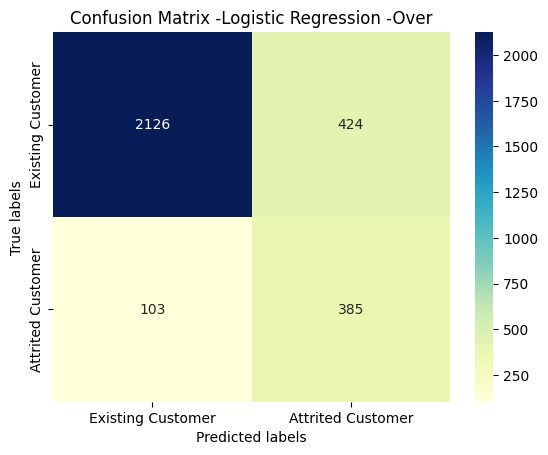

Bagging - Over


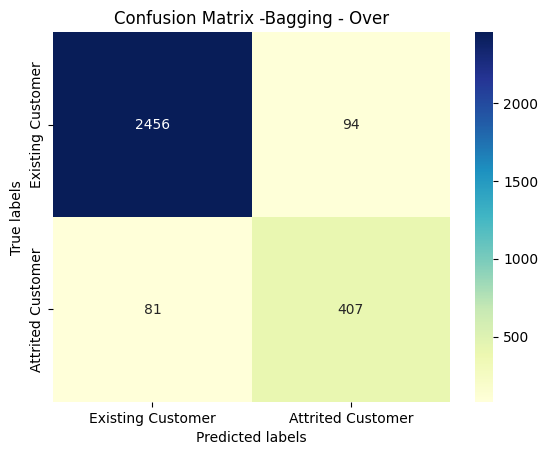

Random forest - Over


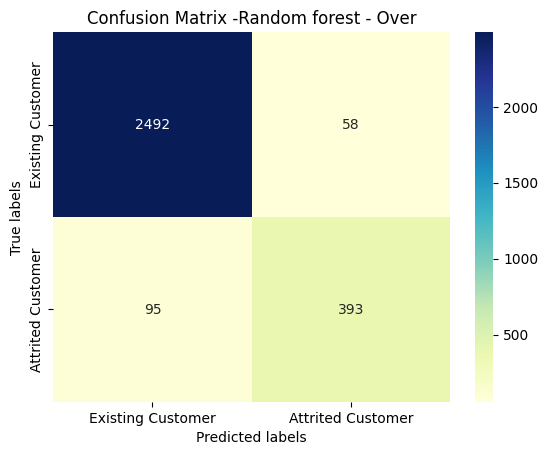

Decision Tree - Over


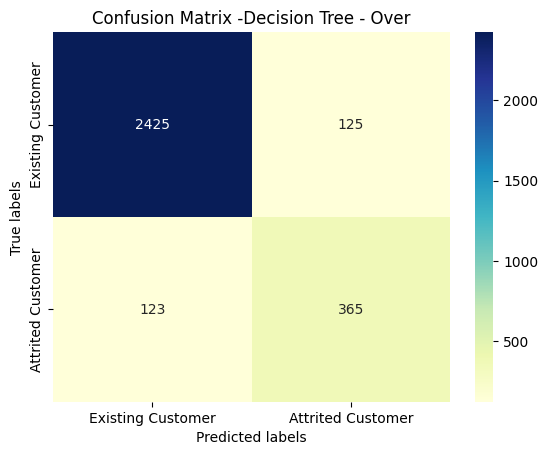

AdaBoost - Over


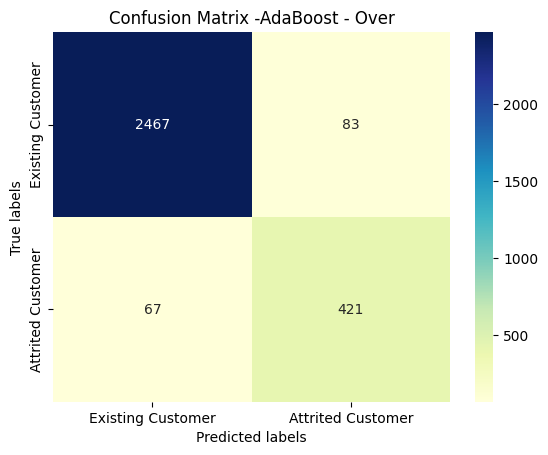

Gradient Boosting -Over


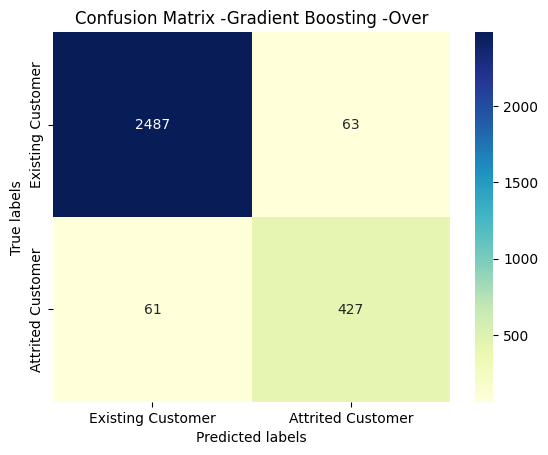

XGBoost - Over


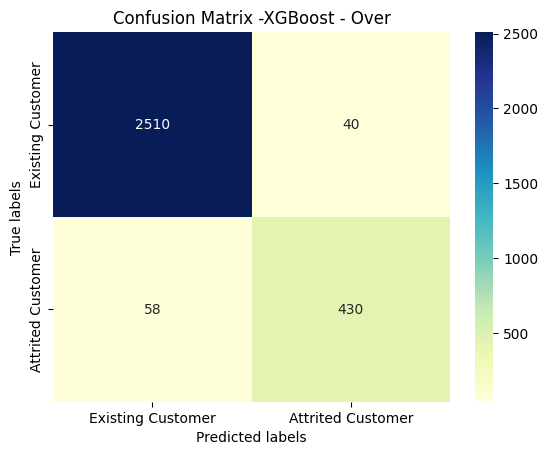

In [355]:
# plot confusion matrix for all models
for name, model in models:
    print(name)
    plot_confusion_matrix(model, X_val, y_val,name=name)
    plt.show()

**Observations**
- Recall is slightly improved for all models and precision is slightly decreased for all models after over sampling which is expected as the model is now predicting more positive cases which are not actually positive cases.
- The models are now predicting more false positive cases which are not actually positive cases. This is evident from the confusion matrix of all models after over sampling.
- It is not still not best prediction as the recall is still low for all models. We will try under sampling to see if it improves the recall.

### Model Building with Undersampled data

In [356]:
# Random undersampler for under sampling the data, random state is set to 1 for reproducibility and sampling strategy is set to 1  to balance the classes
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
# fit the resampling method to the training data and reduce the number of samples in the majority class
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [357]:
undersample_score = []  # Empty list to store all the scores
models = []  # Empty list to store all the models
models.append(("Logistic Regression -Under", LogisticRegression(random_state=1))) # Logistic Regression
models.append(("Bagging - Under", BaggingClassifier(random_state=1))) # Bagging
models.append(("Random forest - Under", RandomForestClassifier(random_state=1))) # Random forest
models.append(("Decision Tree - Under", DecisionTreeClassifier(random_state=1))) # Decision Tree
models.append(("AdaBoost - Under", AdaBoostClassifier(random_state=1))) # AdaBoost
models.append(("Gradient Boosting -under", GradientBoostingClassifier(random_state=1))) # Gradient Boosting
models.append(("XGBoost - Under", XGBClassifier(random_state=1))) # XGBoost

print("\n" "Training Performance with Under Sampling:" "\n")
print("--------------------------------------------------------")
for name, model in models:
    # fit the model with under sampled training data
    model.fit(X_train_un, y_train_un) 
    # compute the performance metrics
    scores = model_performance_classification_sklearn(model, X_train_un, y_train_un,name=name)
    # store the performance metrics for the model for later use and final validation
    undersample_score.append(scores) # store the scores for printing
    
 
# Print the scores
pd.concat(undersample_score, ignore_index=True).sort_values(by="F1", ascending=False)


Training Performance with Under Sampling:

--------------------------------------------------------


,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
2,Random forest - Under,train,1.000000,1.000000,1.000000,1.000000,1.000000
3,Decision Tree - Under,train,1.000000,1.000000,1.000000,1.000000,1.000000
6,XGBoost - Under,train,1.000000,1.000000,1.000000,1.000000,1.000000
1,Bagging - Under,train,0.995080,0.992620,0.997528,0.995068,0.995080
5,Gradient Boosting -under,train,0.979090,0.985240,0.973269,0.979218,0.979090
4,AdaBoost - Under,train,0.940344,0.950800,0.931325,0.940962,0.940344
0,Logistic Regression -Under,train,0.816113,0.826568,0.809639,0.818016,0.816113


In [358]:
# avoid duplication of scores when running multiple times
undersample_score = [scores for scores in undersample_score if scores["Data Type"].values[0] == "train"]
# Performance evaluation with validation set
print("\n" "Validation Performance with Under Sampling:" "\n")
print("--------------------------------------------------------")
for name, model in models:
    # fit the model with under sampled training data
    model.fit(X_train_un, y_train_un) 
    # compute the performance metrics with validation data unsampled
    scores_val = model_performance_classification_sklearn(model, X_val, y_val, name=name, datatype="validation")
    # store the performance metrics for the model for later use and final validation
    undersample_score.append(scores_val) 
      
 
# Print the scores
pd.concat(undersample_score, ignore_index=True).sort_values(by="F1", ascending=False).where(lambda x : x["Data Type"] == "validation").dropna()


Validation Performance with Under Sampling:

--------------------------------------------------------


,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
13,XGBoost - Under,validation,0.952930,0.963115,0.789916,0.867959,0.957048
9,Random forest - Under,validation,0.941409,0.936475,0.756623,0.836996,0.939414
12,Gradient Boosting -under,validation,0.940750,0.934426,0.754967,0.835165,0.938194
8,Bagging - Under,validation,0.941080,0.915984,0.764103,0.833178,0.930933
11,AdaBoost - Under,validation,0.932192,0.936475,0.723101,0.816071,0.933924
10,Decision Tree - Under,validation,0.916392,0.885246,0.685714,0.772809,0.903799
7,Logistic Regression -Under,validation,0.818631,0.811475,0.463158,0.589724,0.815738


In [359]:
# Print all the scores from top 3 models  for validation data for comparison
# find the type of all_scores
xboostmodelsnames = ["XGBoost - Under" , "XGBoost - Over", "XGBoost Default", "Gradient Boosting -under", "Gradient Boosting -Over", "Gradient Boosting Default"]
all_scores_df = pd.concat(default_scores + oversample_score + undersample_score, ignore_index=True)
# filter the all_scores list to get the scores for XGBoost models and data type validation
xboost_scores_df =  all_scores_df[all_scores_df["Model"].isin(xboostmodelsnames)  & all_scores_df["Data Type"].isin(["validation"])].sort_values(by="F1", ascending=False)
 
xboost_scores_df 
 

,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
27,XGBoost - Over,validation,0.967742,0.881148,0.914894,0.897704,0.932731
13,XGBoost Default,validation,0.967413,0.868852,0.923747,0.895459,0.927563
26,Gradient Boosting -Over,validation,0.959184,0.875000,0.871429,0.873211,0.925147
41,XGBoost - Under,validation,0.952930,0.963115,0.789916,0.867959,0.957048
12,Gradient Boosting Default,validation,0.957867,0.813525,0.914747,0.861171,0.899507
40,Gradient Boosting -under,validation,0.940750,0.934426,0.754967,0.835165,0.938194


**Observations**
- XGBoost with under sampling provides the best performance on the validation set for recall but precision_score dropped significantly compared to default XGBoost oversampling and default XGBoost. Undersampling clearly has a negative impact on precision and accuracy.
- Identifying attrited customers is more important than identifying existing customers. Recall is the most important metric for this problem. The model with the highest recall score is the best model.

##### Confustion Matrix for Undersample Models #####

Logistic Regression -Under


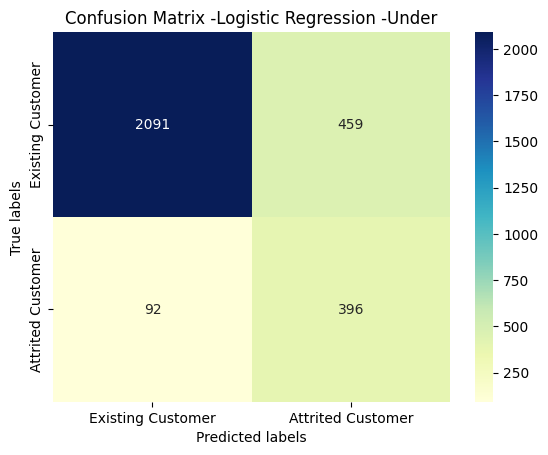

Bagging - Under


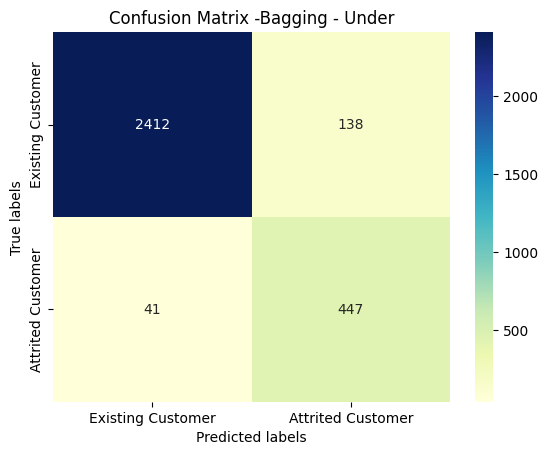

Random forest - Under


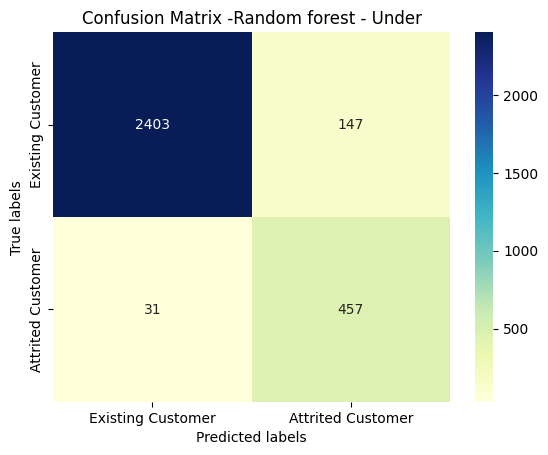

Decision Tree - Under


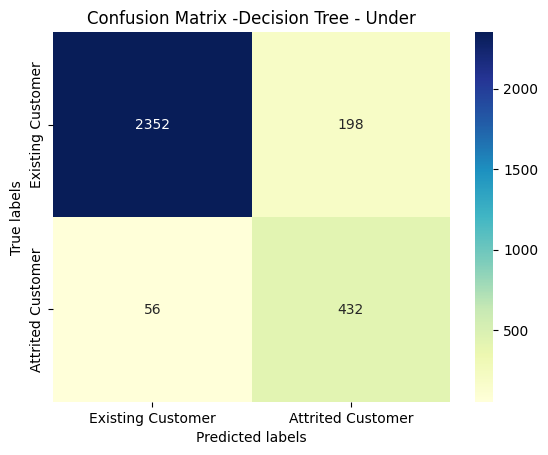

AdaBoost - Under


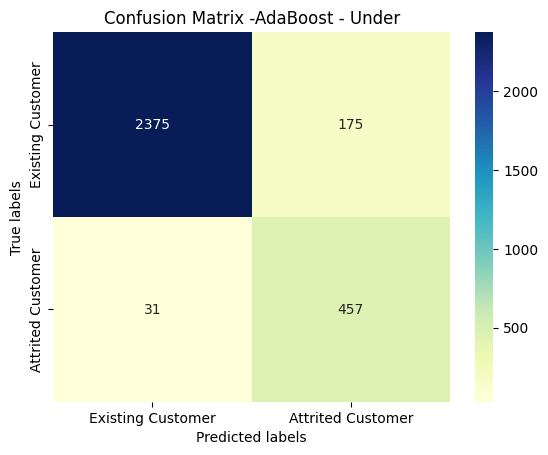

Gradient Boosting -under


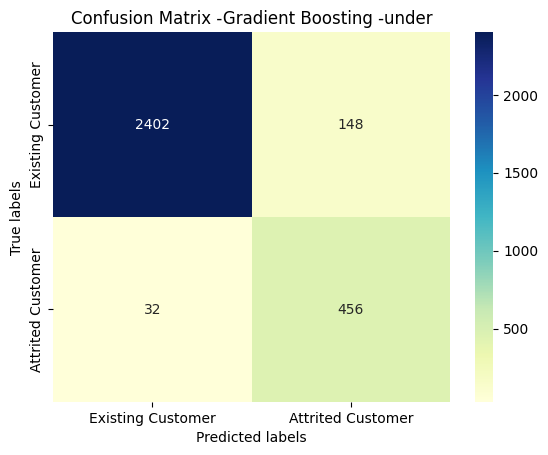

XGBoost - Under


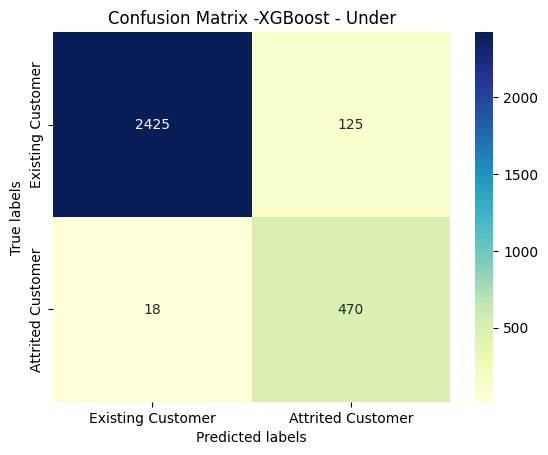

In [360]:
# Confusion matrix for all models
for name, model in models:
    print(name)
    plot_confusion_matrix(model, X_val, y_val,name=name)
    plt.show()

##### Observations #####
- Clearly from confusion matrix, Undersampling method identify most attributed customers but with cost of More False postives which is excepted as we are reducing the majority class


### HyperparameterTuning

#### RandomSearch Grid

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**


- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### We will check hypertunning for Xboost boost with Over and Undersample data 

##### RandomSearchgrid with XGBoos - Oversample data 

In [361]:
# Hypertunning the XGBoost model using RandomizedSearchCV
xcboost_hypertun_over_score = []  # Empty list to store all the scores

Model = XGBClassifier(random_state=1)
param_grid={
   'n_estimators':np.arange(50,300,50), # Number of trees
   'scale_pos_weight':[0,1,2,5,10], # Control the balance of positive and negative weights, useful for unbalanced classes
   'learning_rate':[0.01,0.1,0.2,0.05], # Step size shrinkage used in update to prevents overfitting
   'gamma':[0,1,3,5], # Minimum loss reduction required to make a further partition on a leaf node of the tree
   'subsample':[0.7,0.8,0.9,1], # Subsample ratio of the training instances
}
# Parameter grid to pass in RandomSearchCV
# param_grid = {'max_depth': np.arange(2,6), # Maximum depth of the tree
#               'min_samples_leaf': [1, 4, 7], # Minimum samples in leaf node
#               'max_leaf_nodes' : [10,15], 
#               'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
rcv_xgboost_over = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=acc_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
rcv_xgboost_over.fit(X_train_over,y_train_over)

scores = model_performance_classification_sklearn(rcv_xgboost_over,X_train_over, y_train_over, name='XGBoost - Over-Hp', datatype="train")
xcboost_hypertun_over_score.append(scores)
print("Best parameters are {} with CV score={}:" .format(rcv_xgboost_over.best_params_,rcv_xgboost_over.best_score_))
pd.concat(xcboost_hypertun_over_score, ignore_index=True).sort_values(by="F1", ascending=False)

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9879999999999999:


,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
0,XGBoost - Over-Hp,train,0.957176,0.999765,0.921292,0.958926,0.957176


In [362]:
# avoid duplication of scores when running multiple times
xcboost_hypertun_over_score = [scores for scores in xcboost_hypertun_over_score if scores["Data Type"].values[0] == "train"]
# Performance evaluation with validation set
scores_val = model_performance_classification_sklearn(rcv_xgboost_over, X_val, y_val, name='XGBoost - Over-Hp', datatype="validation")
xcboost_hypertun_over_score.append(scores_val)
print("Best parameters are {} with CV score={}:" .format(rcv_xgboost_over.best_params_,rcv_xgboost_over.best_score_))
pd.concat(xcboost_hypertun_over_score, ignore_index=True).sort_values(by="F1", ascending=False)

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9879999999999999:


,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
0,XGBoost - Over-Hp,train,0.957176,0.999765,0.921292,0.958926,0.957176
1,XGBoost - Over-Hp,validation,0.914747,0.946721,0.664748,0.781065,0.927674


In [363]:
xcboost_hypertun_un_score= []  # Empty list to store all the scores

Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

#Calling RandomizedSearchCV
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)
rcv_xgboost_under = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=acc_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
rcv_xgboost_under.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(rcv_xgboost_under.best_params_,rcv_xgboost_under.best_score_))
scores = model_performance_classification_sklearn(rcv_xgboost_under,X_train_un, y_train_un, name='XGBoost - Under-Hp', datatype="train")
xcboost_hypertun_un_score.append(scores)
pd.concat(xcboost_hypertun_un_score, ignore_index=True).sort_values(by="F1", ascending=False)

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9840187836097856:


,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
0,XGBoost - Under-Hp,train,0.945264,1.0,0.90133,0.948105,0.945264


In [364]:
# Validation set
xcboost_hypertun_un_score = [scores for scores in xcboost_hypertun_un_score if scores["Data Type"].values[0] == "train"]
scores_val = model_performance_classification_sklearn(randomized_cv, X_val, y_val, name='XGBoost - Under-Hp', datatype="validation")
xcboost_hypertun_un_score.append(scores_val)
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
pd.concat(xcboost_hypertun_un_score, ignore_index=True).sort_values(by="F1", ascending=False)

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1} with CV score=0.9840187836097856:


,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
0,XGBoost - Under-Hp,train,0.945264,1.000000,0.901330,0.948105,0.945264
1,XGBoost - Under-Hp,validation,0.873272,0.971311,0.560947,0.711178,0.912911


- Perfomance has not improved after hypertunning the model using RandomizedSearchCV 
- So far Xgboost with oversampling and Xgboost with undersampling provided the best performance ,we will use them for final test validation

## Model Comparison and Final Model Selection

- XGBoost model with oversampled data and Under sampled data with recall score as the scoring metric provided the best performance on the validation set.
- The model with oversampled data and undersampled is selected as the final model and is evaluated on the test set

##### Test Validation #####

**Since XGboost with sampling provided best performance we will be only using this model for test**

In [365]:
test_scores = []  # Empty list to store all the scores
# Performance evaluation with test set for over sampled data with xgboost classifier with default parameters
final_model_xgb_over = XGBClassifier(random_state=1)
final_model_xgb_over.fit(X_train_over, y_train_over)
scores_test = model_performance_classification_sklearn(final_model_xgb_over, X_test, y_test, name='XGBoost - Over-Hp', datatype="test")
test_scores.append(scores_test)
# print the scores with dataframes
pd.concat(test_scores, ignore_index=True).sort_values(by="F1", ascending=False)
 

,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
0,XGBoost - Over-Hp,test,0.969398,0.883436,0.923077,0.902821,0.934659


In [366]:
 
# Performance evaluation with test set for over under data with xgboost classifier with default parameters
final_model_xgb_un = XGBClassifier(random_state=1)
final_model_xgb_un.fit(X_train_un, y_train_un)
scores_test = model_performance_classification_sklearn(final_model_xgb_un, X_test, y_test, name='XGBoost - Under-Hp', datatype="test")
test_scores.append(scores_test)
# print the scores with dataframes
pd.concat(test_scores, ignore_index=True).sort_values(by="F1", ascending=False)
 


,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
0,XGBoost - Over-Hp,test,0.969398,0.883436,0.923077,0.902821,0.934659
1,XGBoost - Under-Hp,test,0.941757,0.944785,0.754902,0.839237,0.942981


### Test set final performance

oversample_df 

In [367]:
xgbmodelsnames = [ "XGBoost - Under", "XGBoost - Over" ]
all_scores_df = pd.concat(oversample_score + undersample_score, ignore_index=True)
# filter the all_scores list to get the scores for XGBoost models and data type validation
xgb_scores_df =  all_scores_df[all_scores_df["Model"].isin(xgbmodelsnames) & all_scores_df["Data Type"].isin(["validation"]) ].sort_values(by="F1", ascending=False)
xgb_scores_df

,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
13,XGBoost - Over,validation,0.967742,0.881148,0.914894,0.897704,0.932731
27,XGBoost - Under,validation,0.952930,0.963115,0.789916,0.867959,0.957048


In [368]:
pd.concat(test_scores, ignore_index=True).sort_values(by="F1", ascending=False)
 

,Model,Data Type,Accuracy,Recall,Precision,F1,ROC AUC Score
0,XGBoost - Over-Hp,test,0.969398,0.883436,0.923077,0.902821,0.934659
1,XGBoost - Under-Hp,test,0.941757,0.944785,0.754902,0.839237,0.942981


##### Feature Importance #####



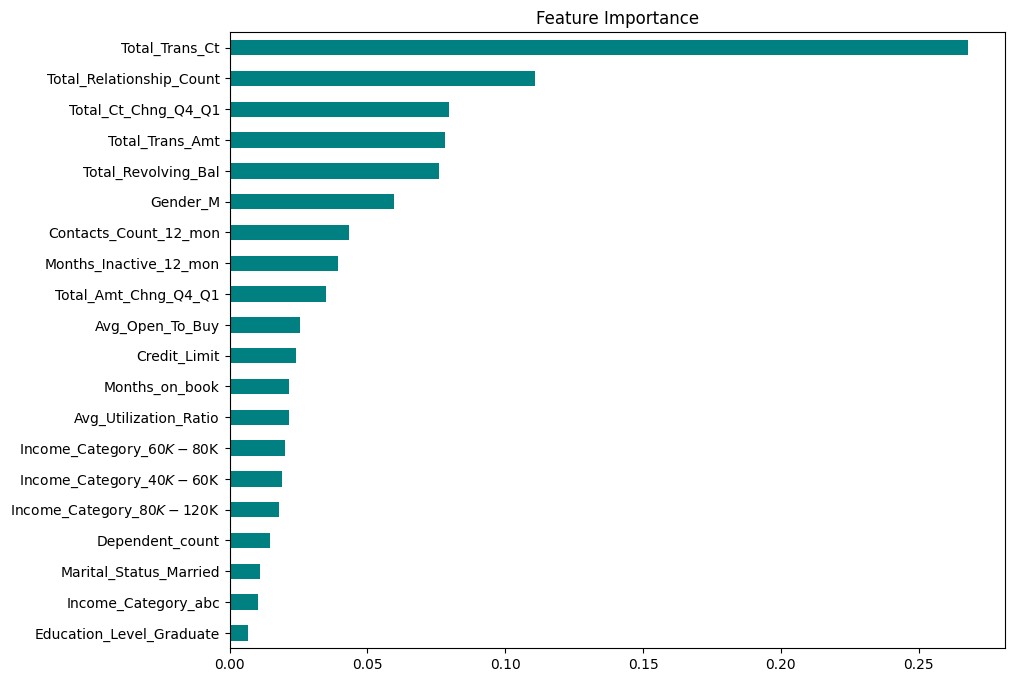

In [369]:
# plot the importance of features in the model 
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(final_model_xgb_un.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.show()

# Business Insights and Conclusions

***

- The model with the best performance is the XGBoost model with under sampled data.
- The model has a recall of 0.95, precision of 0.75, accuracy of 0.94 and F1 score of 0.84. 
- Though the accuracy ,precision and F1score is high with oversampling method, the recall is more important in this case as we want to identify as many customers who are likely to churn as possible.
- important features in the model are Total Transaction count, Total Transaction Amount, Total Revolving Balance, Total Relationship Count and Total Amount Change Q4 over Q1.
- The bank should focus on these features to improve customer retention. Improving the customer experience, providing better offers and rewards, and improving the quality of service can help in retaining customers.
- Rewards and offers can be provided to customers who have a high total transaction count and total transaction amount.